# Iterative Soundbite on Respective Dataset

**Based on respective 'peak upload' days and time of days, it is recommended to put on extra servers during peak days/hours of Fridays from 2pm-3pm and Wednesdays from midnight-1am. Additionally, during peak monthly seasonality in April, July, and August even more server capacity is recommended during Fridays in April from 2pm-3pm, Wednesdays in July from midnight-1am, and Fridays in August at 2pm-3pm, 6pm-7pm, and 1am-2am. These times are identified as when the largest volume of pages are uploaded, which is indicative of both upload time (in seconds) and file size.**

* **Purpose:** Submit recommendation for days and time of days to put on extra servers. 
* **Criteria for success:** Identify when peak upload time occurs. what are the most active days and times of days (week/month/year) when uploading transpires. 
* **Scope:** Explore and Analyze the relationship between the upload attributes: File Size, Page Count, Document Count, Upload Time (in seconds). Preform feature engineering in pandas to enhance timeseries data analysis (upload_time, seconds, month, day_of_week, hour, day_of_year).
* **Constraints:** the range of values in the data must be initially observed and visualized appropriately to map relevant statistical insights to business solutions. Normal distribution is not 'easily' observable given the wide range of values in this data set, but this is good to know and establish. A Right Skew is clearly observable in seaborn after cleaning values (1k bytes to 2M bytes). However there is a rather large gap range between the average (1.8B) and median (15.5M). Meaning there is a noticable variance in the data. This is naturally true not only for file size, but also page count and upload time respectively.
* **Key data sources:** Respective JSON files.


-Further EDA can be conducted and iterated upon from these inception discovery points. 

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [3]:
DATA_DIR = "data-files"

In [4]:
accounts_file = os.path.join(DATA_DIR, "accounts.json")
projects_file = os.path.join(DATA_DIR, "projects.json")
uploads_file = os.path.join(DATA_DIR, "uploads.json")

In [5]:
print(uploads_file)

data-files\uploads.json


In [6]:
df_uploads_file = pd.read_json(uploads_file, lines=True)

In [7]:
df_uploads_file

,id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4
1,347163,2021-11-12 14:30:01,2021-11-12 14:56:21,679618,NaT,2021-11-12 14:54:45,2021-11-12 14:55:59,2563859,25,27
2,347166,2021-03-10 10:08:41,2021-03-10 10:10:07,571057,2021-03-10 10:10:07,2021-03-10 10:08:44,2021-03-10 10:09:18,846,1,1
3,347168,2021-02-22 06:08:42,2021-02-22 06:10:04,566933,2021-02-22 06:10:04,2021-02-22 06:08:45,2021-02-22 06:09:13,833,1,1
4,347169,2021-03-24 21:50:23,2021-03-24 21:58:09,574136,2021-03-24 21:58:09,2021-03-24 21:50:29,2021-03-24 21:52:37,6190706,30,87
...,...,...,...,...,...,...,...,...,...,...
199995,947735,2021-07-16 21:27:23,2021-07-16 21:28:27,82885,NaT,2021-07-16 21:27:23,2021-07-16 21:28:16,110222442,348,929
199996,947738,2021-11-18 16:42:32,2021-11-18 16:49:36,681258,NaT,2021-11-18 16:48:15,2021-11-18 16:49:33,24346529,90,656
199997,947739,2021-02-12 21:53:05,2021-02-13 00:18:13,680635,NaT,2021-02-13 00:13:30,2021-02-13 00:17:51,164216540,858,1867
199998,947744,2021-01-27 21:16:29,2021-01-27 21:30:09,627862,NaT,2021-01-27 21:29:23,2021-01-27 21:30:07,92930,1,3


In [8]:
df_uploads_file.shape

(200000, 10)

In [9]:
df_uploads_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              200000 non-null  int64         
 1   created_at      200000 non-null  datetime64[ns]
 2   updated_at      200000 non-null  datetime64[ns]
 3   project_id      200000 non-null  int64         
 4   deleted_at      70930 non-null   datetime64[ns]
 5   started_at      199994 non-null  datetime64[ns]
 6   ended_at        200000 non-null  datetime64[ns]
 7   size            200000 non-null  int64         
 8   document_count  200000 non-null  int64         
 9   page_count      200000 non-null  int64         
dtypes: datetime64[ns](5), int64(5)
memory usage: 15.3 MB


In [10]:
df_uploads_file.isna().sum()

id                     0
created_at             0
updated_at             0
project_id             0
deleted_at        129070
started_at             6
ended_at               0
size                   0
document_count         0
page_count             0
dtype: int64

Count Unique Values in Each Columns

In [11]:
for col in df_uploads_file.columns:
    print(col, df_uploads_file[col].nunique())

id 200000
created_at 65972
updated_at 57954
project_id 16646
deleted_at 15601
started_at 66134
ended_at 66031
size 177965
document_count 18256
page_count 35788


In [12]:
df_uploads_file.describe()

,id,project_id,size,document_count,page_count
count,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,647422.853175,514935.373870,1.792301e+09,4.093339e+03,3.734678e+04
std,173489.540055,229048.947918,1.179648e+10,4.592250e+04,4.736359e+05
min,347160.000000,41445.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,497154.750000,561341.000000,4.209148e+05,1.000000e+00,5.000000e+00
50%,647474.000000,627862.000000,1.551161e+07,1.700000e+01,1.570000e+02
75%,797746.250000,663021.000000,2.241547e+08,3.490000e+02,2.471000e+03
max,947745.000000,683238.000000,9.175560e+11,4.747395e+06,6.901784e+07


File Size, 50% percentile (Median) is 15,511,610.

In [14]:
df_uploads_file['size'].median()

15511613.5

In [13]:
df_uploads_file['size'].mean()

1792300507.209235

the average file size (1.8B) is significantly larger than the median file size (15M)

we should observe a right skew distribution using a seaborn distplot to verify this. 

Also, check to verify the median and mean of page_count 

we will discover more the importance of the page_count attritute towards the bottom of the notebook discovery, but I want to include it in the EDA process here for relevance sake

In [15]:
df_uploads_file['page_count'].median()

157.0

In [16]:
df_uploads_file['page_count'].mean()

37346.78213

the average page count (37,346) is significantly larger than the median page count (157)

## Visualizing File Size Values

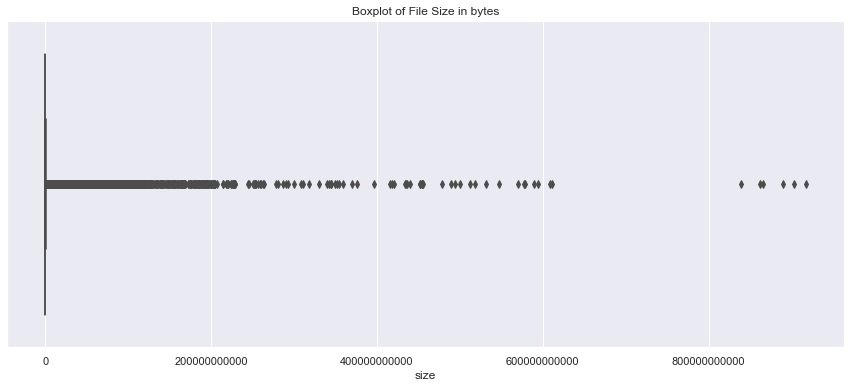

In [19]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='size', data=df_uploads_file)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of File Size in bytes')
plt.savefig('s1_box_plot_filesize_bytes.jpg')
plt.show()


a few files are extremely large, above 800B bytes

... after several iterations in seaborn below, univarite distribution (normal distribtuion) is not easily viewable on file size until the bottom value is set to 1000 bytes and the top value is set 2M bytes....

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


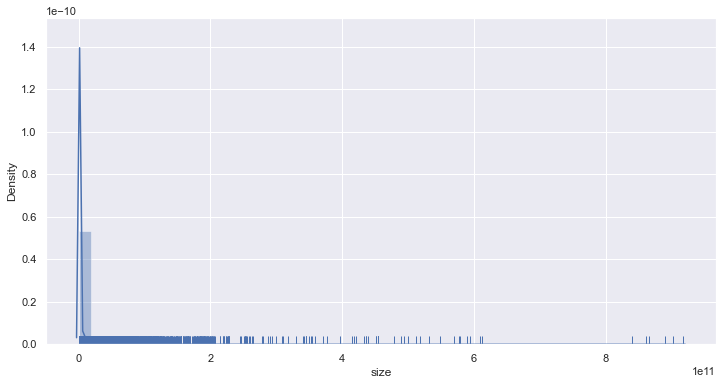

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df_uploads_file['size'], kde=True, bins=50, rug=True)
plt.show()

Wow, several zero values (as well as values close to zero). The spike shows univariate distribution clustered around zero. Let's rerun with values above 0, and try iterations setting the top values to see if/where we can observe something that resembles where univarite distribution exists. We should find a right skew, given the average is greater than the median.

IMPORTANT: multiple iterations where preformed on size between a low_size[1-1000 bytes] and higher size[1M - 400B bytes]. I have removed many of those iterations from the Jupyter Notebook because they are irrelivant to the findings. When slicing the data all the way to 1k bytes (low) and 2M bytes (high) we observe a right skew distribution. However, when running statsmodel later and preforming feature engineering do develop timeseries data, I decided to keep all of the original data in tact. 

The data observed looks so spread out (in terms of both file sizes and page sizes) that I want to keep it all for the sake of the upload time analysis, and identifying peak upload times.

...getting closer...but still some work to do to discover univariate distribution.....once we understand the numbers behind the size data itself, that should help us in understanding what factors impact the size....need to have a clear understanding of the size data first to empower what factors impact it...

In [18]:
df_uploads_file_above_zero = df_uploads_file[(df_uploads_file['size']>0)]

In [40]:
df_uploads_file_above_zero_below_500M = df_uploads_file_above_zero[(df_uploads_file_above_zero['size']<500000000)]

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


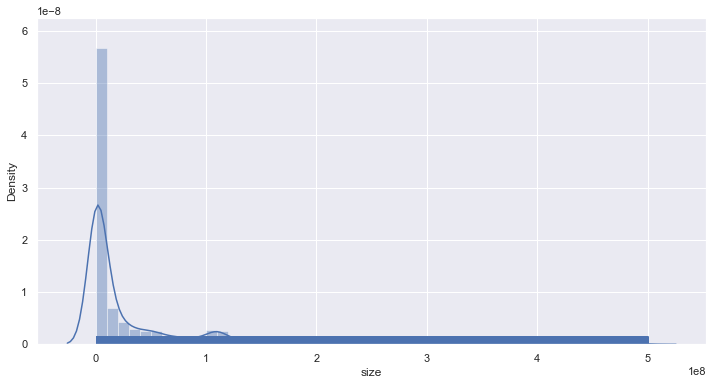

In [41]:
plt.figure(figsize=(12,6))
sns.distplot(df_uploads_file_above_zero_below_500M['size'], kde=True, bins=50, rug=True)
plt.show()

interesting observation above...there are a higher number of instances between 1M - 1.2M bytes than there are between 800k - 1M bytes

### Creating df above 1k

**after several iterations, to easily observe normal distribution, I have created a df above 1000 bytes....however this is only for the purpose of observing normal distribution and verifying the right skew.....when I preform feature engineering and timeseries analysis later, I will actually keep all of the original values from the data in tact....**

In [20]:
df_uploads_file_above_1k = df_uploads_file[(df_uploads_file['size']>1000)]

In [21]:
df_uploads_file_above_1k_below_1M = df_uploads_file_above_1k[(df_uploads_file_above_1k['size']<1000000)]

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


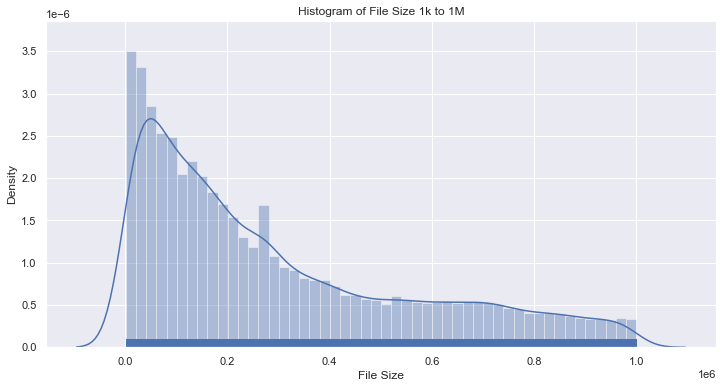

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(df_uploads_file_above_1k_below_1M['size'], kde=True, bins=50, rug=True)

plt.xlabel("File Size")
plt.ylabel("Density")
plt.title("Histogram of File Size 1k to 1M")
plt.savefig('histogram_1k_1M.jpg')
plt.show()

the KDE is obersvable now towards something that resmebles a normal distribution pattern....however there is a substantial right skew...

In [24]:
df_uploads_file_above_1k_below_1p5M = df_uploads_file_above_1k[(df_uploads_file_above_1k['size']<1500000)]

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


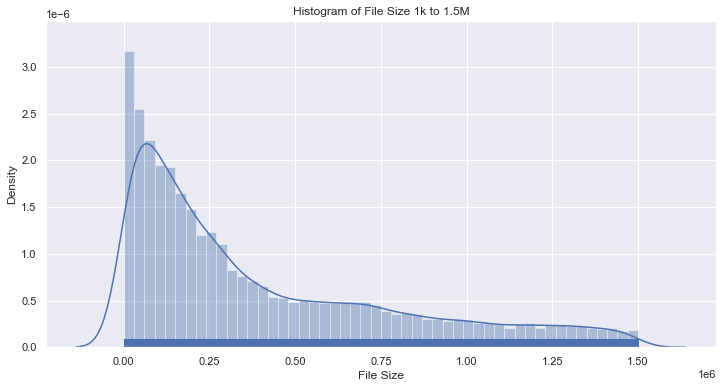

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(df_uploads_file_above_1k_below_1p5M['size'], kde=True, bins=50, rug=True)

plt.xlabel("File Size")
plt.ylabel("Density")
plt.title("Histogram of File Size 1k to 1.5M")
plt.savefig('histogram_1k_1.5M.jpg')
plt.show()

In [26]:
df_uploads_file_above_1k_below_2M = df_uploads_file_above_1k[(df_uploads_file_above_1k['size']<2000000)]

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


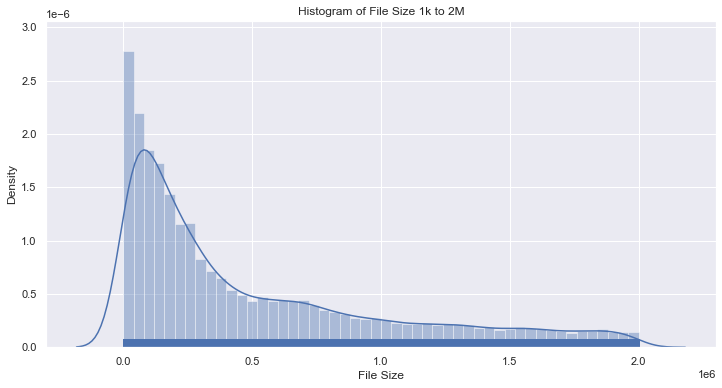

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(df_uploads_file_above_1k_below_2M['size'], kde=True, bins=50, rug=True)
plt.xlabel("File Size")
plt.ylabel("Density")
plt.title("Histogram of File Size 1k to 2M")
plt.savefig('histogram_1k_2M.jpg')
plt.show()

After preforming basic data wrangling on the size attribute, I feel like I have a general idea of the data we are working with here....it is very spead out. There are a ton of smaller uploads (under 1000 bytes)....However there is a long right tail, with the instances on the right being in the millions, hundreds of millions, billions, and hundreds of billions of bytes...

Now I am going to explore how to estimate how long each upload will take to process

Initially, I will check which is more closely related to file size, document_count or page_count

Next, I will do feature engineering to add a seconds column to check the linear relationship between upload time in seconds and the attributes : file size, page count, and document count

When preforming the linear regression analysis, I have decided not to remove any of the values in the data...

In other words, even though we had to cut the data at 1000 bytes (low) and 1M-2M bytes (high) to observe right skew distribution...I do not want to remove any of the values when exploring linear relationships....in other words....if a file is extremely small, I will keep it...if a file is extremely large...I will keep it....as I am operating from the assumption that upload time will be faster for smaller files....and longer for larger files....even if they are extremely large or extremely small....I simply want to check the linear relationship over all....

In [28]:
df_uploads_file

,id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4
1,347163,2021-11-12 14:30:01,2021-11-12 14:56:21,679618,NaT,2021-11-12 14:54:45,2021-11-12 14:55:59,2563859,25,27
2,347166,2021-03-10 10:08:41,2021-03-10 10:10:07,571057,2021-03-10 10:10:07,2021-03-10 10:08:44,2021-03-10 10:09:18,846,1,1
3,347168,2021-02-22 06:08:42,2021-02-22 06:10:04,566933,2021-02-22 06:10:04,2021-02-22 06:08:45,2021-02-22 06:09:13,833,1,1
4,347169,2021-03-24 21:50:23,2021-03-24 21:58:09,574136,2021-03-24 21:58:09,2021-03-24 21:50:29,2021-03-24 21:52:37,6190706,30,87
...,...,...,...,...,...,...,...,...,...,...
199995,947735,2021-07-16 21:27:23,2021-07-16 21:28:27,82885,NaT,2021-07-16 21:27:23,2021-07-16 21:28:16,110222442,348,929
199996,947738,2021-11-18 16:42:32,2021-11-18 16:49:36,681258,NaT,2021-11-18 16:48:15,2021-11-18 16:49:33,24346529,90,656
199997,947739,2021-02-12 21:53:05,2021-02-13 00:18:13,680635,NaT,2021-02-13 00:13:30,2021-02-13 00:17:51,164216540,858,1867
199998,947744,2021-01-27 21:16:29,2021-01-27 21:30:09,627862,NaT,2021-01-27 21:29:23,2021-01-27 21:30:07,92930,1,3


feature engineering upload_time column 

In [29]:
df_uploads_file['upload_time'] = df_uploads_file['ended_at'] - df_uploads_file['started_at']  

In [30]:
df_uploads_file.head()

,id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count,upload_time
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4,0 days 00:00:36
1,347163,2021-11-12 14:30:01,2021-11-12 14:56:21,679618,NaT,2021-11-12 14:54:45,2021-11-12 14:55:59,2563859,25,27,0 days 00:01:14
2,347166,2021-03-10 10:08:41,2021-03-10 10:10:07,571057,2021-03-10 10:10:07,2021-03-10 10:08:44,2021-03-10 10:09:18,846,1,1,0 days 00:00:34
3,347168,2021-02-22 06:08:42,2021-02-22 06:10:04,566933,2021-02-22 06:10:04,2021-02-22 06:08:45,2021-02-22 06:09:13,833,1,1,0 days 00:00:28
4,347169,2021-03-24 21:50:23,2021-03-24 21:58:09,574136,2021-03-24 21:58:09,2021-03-24 21:50:29,2021-03-24 21:52:37,6190706,30,87,0 days 00:02:08


In [31]:
df_uploads_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   id              200000 non-null  int64          
 1   created_at      200000 non-null  datetime64[ns] 
 2   updated_at      200000 non-null  datetime64[ns] 
 3   project_id      200000 non-null  int64          
 4   deleted_at      70930 non-null   datetime64[ns] 
 5   started_at      199994 non-null  datetime64[ns] 
 6   ended_at        200000 non-null  datetime64[ns] 
 7   size            200000 non-null  int64          
 8   document_count  200000 non-null  int64          
 9   page_count      200000 non-null  int64          
 10  upload_time     199994 non-null  timedelta64[ns]
dtypes: datetime64[ns](5), int64(5), timedelta64[ns](1)
memory usage: 16.8 MB


In [32]:
df_uploads_file.tail()

,id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count,upload_time
199995,947735,2021-07-16 21:27:23,2021-07-16 21:28:27,82885,NaT,2021-07-16 21:27:23,2021-07-16 21:28:16,110222442,348,929,0 days 00:00:53
199996,947738,2021-11-18 16:42:32,2021-11-18 16:49:36,681258,NaT,2021-11-18 16:48:15,2021-11-18 16:49:33,24346529,90,656,0 days 00:01:18
199997,947739,2021-02-12 21:53:05,2021-02-13 00:18:13,680635,NaT,2021-02-13 00:13:30,2021-02-13 00:17:51,164216540,858,1867,0 days 00:04:21
199998,947744,2021-01-27 21:16:29,2021-01-27 21:30:09,627862,NaT,2021-01-27 21:29:23,2021-01-27 21:30:07,92930,1,3,0 days 00:00:44
199999,947745,2021-03-22 19:31:58,2022-01-04 17:06:00,640401,2022-01-04 17:06:00,2021-03-22 19:32:40,2021-03-22 19:33:27,1622673,1,16,0 days 00:00:47


# Identifying Linear Relationships

Initially I want to explore linear relationship between existing columns, with size as the dependant variable.

**It is discovered below that page_count has a more direct impact on file size than document count. This makes sense, as some documents may have a small number of pages, while other documents may have a large number of pages (thus increasing file size).**

In [37]:
df_uploads_file.shape

(200000, 11)

Dependant Variable: size

size and document_count : linear relationship is 0.229 R-squared

size and page_count : linear relationship is 0.325 R-squared

**page_count has a closer linear relationship to size than document count. This means that page_count is a better predictor of size than document count**

In [33]:
independent_variable = df_uploads_file[['document_count']]

dependent_variable = df_uploads_file[['size']]

independent_variable = sm.add_constant(independent_variable)

regression_model = sm.OLS(dependent_variable,independent_variable).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   size   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                 5.925e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:03:33   Log-Likelihood:            -4.8961e+06
No. Observations:              200000   AIC:                         9.792e+06
Df Residuals:                  199998   BIC:                         9.792e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.29e+09   2.33e+07     55.444      0.000    1.24e+09    1.34e+09
document_count  1.228e+05    504.513    243.405      0.000    1.22e+05    1.24e+05
==============================================================================
Omnibus:                   419176.579   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12284241993.227
Skew:                          17.281   Prob(JB):                         0.00
Kurtosis:                    1216.637   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
independent_variable = df_uploads_file[['page_count']]

dependent_variable = df_uploads_file[['size']]

independent_variable = sm.add_constant(independent_variable)

regression_model = sm.OLS(dependent_variable,independent_variable).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   size   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                 9.638e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:03:48   Log-Likelihood:            -4.8827e+06
No. Observations:              200000   AIC:                         9.765e+06
Df Residuals:                  199998   BIC:                         9.765e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.262e+09   2.17e+07     58.055      0.000    1.22e+09     1.3e+09
page_count   1.42e+04     45.749    310.452      0.000    1.41e+04    1.43e+04
==============================================================================
Omnibus:                   457669.016   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6900960183.790
Skew:                          21.939   Prob(JB):                         0.00
Kurtosis:                     911.950   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Engineer a Column from upload_time called seconds
**This is the number of seconds in the upload time for that upload. We will use the column seconds as the dependant variable in regression analysis to further answer the question :"What is the best predictor for how long each upload will take to process?"**

In [35]:
df_uploads_file['seconds'] = df_uploads_file['upload_time'].dt.total_seconds()

In [36]:
df_uploads_file.head(10)

,id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count,upload_time,seconds
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4,0 days 00:00:36,36.0
1,347163,2021-11-12 14:30:01,2021-11-12 14:56:21,679618,NaT,2021-11-12 14:54:45,2021-11-12 14:55:59,2563859,25,27,0 days 00:01:14,74.0
2,347166,2021-03-10 10:08:41,2021-03-10 10:10:07,571057,2021-03-10 10:10:07,2021-03-10 10:08:44,2021-03-10 10:09:18,846,1,1,0 days 00:00:34,34.0
3,347168,2021-02-22 06:08:42,2021-02-22 06:10:04,566933,2021-02-22 06:10:04,2021-02-22 06:08:45,2021-02-22 06:09:13,833,1,1,0 days 00:00:28,28.0
4,347169,2021-03-24 21:50:23,2021-03-24 21:58:09,574136,2021-03-24 21:58:09,2021-03-24 21:50:29,2021-03-24 21:52:37,6190706,30,87,0 days 00:02:08,128.0
5,347174,2021-05-31 13:38:13,2021-10-26 13:59:02,619160,2021-10-26 13:59:02,2021-05-31 13:53:25,2021-05-31 13:55:32,13736324,17,75,0 days 00:02:07,127.0
6,347179,2021-11-10 15:07:00,2021-11-10 16:20:35,676105,NaT,2021-11-10 16:09:06,2021-11-10 16:20:31,2029954381,2266,8957,0 days 00:11:25,685.0
7,347183,2021-07-15 18:36:51,2021-07-15 19:39:45,184657,NaT,2021-07-15 18:45:26,2021-07-15 19:39:33,6575574900,3112,378465,0 days 00:54:07,3247.0
8,347186,2021-03-30 16:36:53,2021-03-30 18:35:18,667647,2021-03-30 18:35:18,2021-03-30 16:38:12,2021-03-30 16:39:21,79499240,63,204,0 days 00:01:09,69.0
9,347189,2021-10-26 03:49:46,2021-10-26 03:51:48,57956,2021-10-26 03:51:48,2021-10-26 03:50:06,2021-10-26 03:50:39,903,1,1,0 days 00:00:33,33.0


In [37]:
df_uploads_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   id              200000 non-null  int64          
 1   created_at      200000 non-null  datetime64[ns] 
 2   updated_at      200000 non-null  datetime64[ns] 
 3   project_id      200000 non-null  int64          
 4   deleted_at      70930 non-null   datetime64[ns] 
 5   started_at      199994 non-null  datetime64[ns] 
 6   ended_at        200000 non-null  datetime64[ns] 
 7   size            200000 non-null  int64          
 8   document_count  200000 non-null  int64          
 9   page_count      200000 non-null  int64          
 10  upload_time     199994 non-null  timedelta64[ns]
 11  seconds         199994 non-null  float64        
dtypes: datetime64[ns](5), float64(1), int64(5), timedelta64[ns](1)
memory usage: 18.3 MB


In [38]:
df_uploads_file.isna().sum()

id                     0
created_at             0
updated_at             0
project_id             0
deleted_at        129070
started_at             6
ended_at               0
size                   0
document_count         0
page_count             0
upload_time            6
seconds                6
dtype: int64

Creating Duplicate DF to drop na values in the newly created seconds column. this is to transform seconds from float to int, and place the data into statsmodel. However I want to keep my original dataframe (df_uploads_file) in tact, in case I make any mistakes while dropping na columns, I will have the original dataframe in place, just fine located at **df_uploads_file**

In [39]:
duplicate_df = df_uploads_file

In [40]:
duplicate_df.isna().sum()

id                     0
created_at             0
updated_at             0
project_id             0
deleted_at        129070
started_at             6
ended_at               0
size                   0
document_count         0
page_count             0
upload_time            6
seconds                6
dtype: int64

In [41]:
duplicate_df.shape

(200000, 12)

In [42]:
duplicate_df = duplicate_df.dropna(subset=['seconds'])

In [43]:
duplicate_df.isna().sum()

id                     0
created_at             0
updated_at             0
project_id             0
deleted_at        129068
started_at             0
ended_at               0
size                   0
document_count         0
page_count             0
upload_time            0
seconds                0
dtype: int64

In [45]:
duplicate_df.shape

(199994, 12)

six rows with missing values are now dropped...we needed to remove 6 NA values from seconds before converting it from float to int....with int data type, will now be able to preform linear regression with in statsmodel...

In [46]:
duplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   id              199994 non-null  int64          
 1   created_at      199994 non-null  datetime64[ns] 
 2   updated_at      199994 non-null  datetime64[ns] 
 3   project_id      199994 non-null  int64          
 4   deleted_at      70926 non-null   datetime64[ns] 
 5   started_at      199994 non-null  datetime64[ns] 
 6   ended_at        199994 non-null  datetime64[ns] 
 7   size            199994 non-null  int64          
 8   document_count  199994 non-null  int64          
 9   page_count      199994 non-null  int64          
 10  upload_time     199994 non-null  timedelta64[ns]
 11  seconds         199994 non-null  float64        
dtypes: datetime64[ns](5), float64(1), int64(5), timedelta64[ns](1)
memory usage: 19.8 MB


In [47]:
# converting 'seconds' from float to int
duplicate_df['seconds'] = duplicate_df['seconds'].astype(int)

<ipython-input-47-f0fba0426dbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['seconds'] = duplicate_df['seconds'].astype(int)


In [48]:
duplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   id              199994 non-null  int64          
 1   created_at      199994 non-null  datetime64[ns] 
 2   updated_at      199994 non-null  datetime64[ns] 
 3   project_id      199994 non-null  int64          
 4   deleted_at      70926 non-null   datetime64[ns] 
 5   started_at      199994 non-null  datetime64[ns] 
 6   ended_at        199994 non-null  datetime64[ns] 
 7   size            199994 non-null  int64          
 8   document_count  199994 non-null  int64          
 9   page_count      199994 non-null  int64          
 10  upload_time     199994 non-null  timedelta64[ns]
 11  seconds         199994 non-null  int32          
dtypes: datetime64[ns](5), int32(1), int64(5), timedelta64[ns](1)
memory usage: 19.1 MB


# Identifying Linear Relationships between Upload Time in seconds and : size, page count, and document count

Dependant Variable: seconds

**seconds and page_count : linear relationship is 0.331 R-squared**

seconds and size : linear relationship is 0.317 R-squared

seconds and document_count : linear relationship is 0.252 R-squared

**page_count has a closer linear relationship to seconds than size or than document count. This means that page_count is a better predictor of upload time than any other variable**

after observing this, we have enough evidence to suggest that page_count is the best predictor of upload time (at least it is the best predictor of all of our given variables)

In [50]:
independent_variable = duplicate_df[['page_count']]

dependent_variable = duplicate_df[['seconds']]

independent_variable = sm.add_constant(independent_variable)

regression_model = sm.OLS(dependent_variable,independent_variable).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                 9.884e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:20   Log-Likelihood:            -2.0658e+06
No. Observations:              199994   AIC:                         4.132e+06
Df Residuals:                  199992   BIC:                         4.132e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        603.9632     16.618     36.344      0.000     571.393     636.534
page_count     0.0110    3.5e-05    314.395      0.000       0.011       0.011
==============================================================================
Omnibus:                   781791.091   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1954594760230.080
Skew:                          94.952   Prob(JB):                         0.00
Kurtosis:                   15317.122   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
independent_variable = duplicate_df[['size']]

dependent_variable = duplicate_df[['seconds']]

independent_variable = sm.add_constant(independent_variable)

regression_model = sm.OLS(dependent_variable,independent_variable).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                 9.280e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:25   Log-Likelihood:            -2.0678e+06
No. Observations:              199994   AIC:                         4.136e+06
Df Residuals:                  199992   BIC:                         4.136e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.1298     16.928     14.185      0.000     206.950     273.309
size        4.323e-07   1.42e-09    304.639      0.000     4.3e-07    4.35e-07
==============================================================================
Omnibus:                   766287.430   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1303818902738.632
Skew:                          89.325   Prob(JB):                         0.00
Kurtosis:                   12510.240   Cond. No.                     1.21e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
independent_variable = duplicate_df[['document_count']]

dependent_variable = duplicate_df[['seconds']]

independent_variable = sm.add_constant(independent_variable)

regression_model = sm.OLS(dependent_variable,independent_variable).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                 6.723e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:32   Log-Likelihood:            -2.0770e+06
No. Observations:              199994   AIC:                         4.154e+06
Df Residuals:                  199992   BIC:                         4.154e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            609.8567     17.588     34.674      0.000     575.384     644.329
document_count     0.0989      0.000    259.294      0.000       0.098       0.100
==============================================================================
Omnibus:                   798627.222   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1680516193145.875
Skew:                         101.862   Prob(JB):                         0.00
Kurtosis:                   14202.524   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Page Count is identified as the best predictor for how long each upload will take to process. Page count has a closer relationship to size (than document count). 

Additionally, page count has a closer linear relationship to upload time (in seconds) than document count AND size. This means that page count is a better predictor of upload time (in seconds) than document count or size. 

In other words, the more number of 'pages' being uploaded, the more time the upload will take...

# What days and time of days should we put on extra servers?

Now that we have discovered page_count is the best predictor for how long each upload will take to process, we want to answer the question 'what days and time of days are the highest volume of pages uploaded?'

Let's use the 'started_at' feature to feature engineer the month, day of week, day of year, and hour (time of day) for when each upload started. we can use page_count as an indicator for how long that upload will take to process...

In [53]:
started_at_page_count = duplicate_df[['started_at','page_count']]

In [54]:
started_at_page_count

,started_at,page_count
0,2021-04-15 19:47:01,4
1,2021-11-12 14:54:45,27
2,2021-03-10 10:08:44,1
3,2021-02-22 06:08:45,1
4,2021-03-24 21:50:29,87
...,...,...
199995,2021-07-16 21:27:23,929
199996,2021-11-18 16:48:15,656
199997,2021-02-13 00:13:30,1867
199998,2021-01-27 21:29:23,3


In [55]:
started_at_page_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   started_at  199994 non-null  datetime64[ns]
 1   page_count  199994 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.6 MB


while the next visual is messy, it quickly gives me an idea of the range of time (Jan 2021 to Jan 2022) I am working with as well as the range of when larger volumes of pages uploaded during the year.

Text(0, 0.5, 'Page Count')

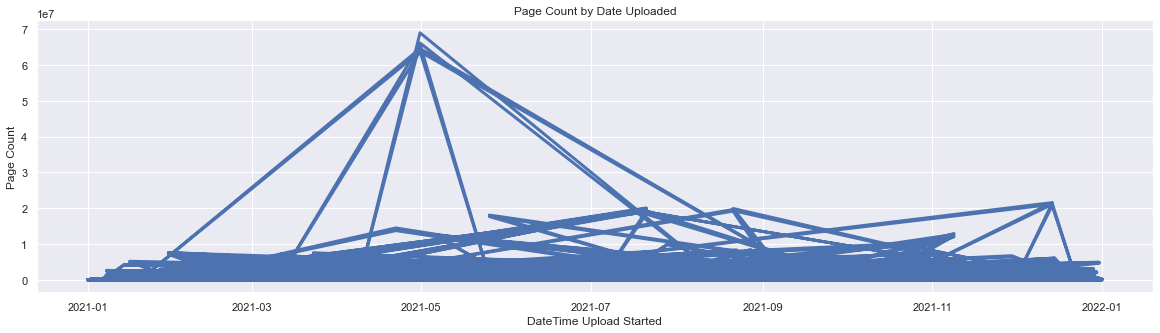

In [56]:
#plot time series
plt.plot(started_at_page_count.started_at, started_at_page_count.page_count, linewidth=3)
#add title and axis labels
plt.title('Page Count by Date Uploaded')
plt.xlabel('DateTime Upload Started')
plt.ylabel('Page Count')

while we will not use the above visual in our presentation, it is helpful to me from an EDA prespective for two reasons: 

1.) shows when very LARGE files started uploading
2.) shows we are working with a 12month timefrome from Jan 2021 to Jan 2022

Next task is feature engineer time series elements into the dataframe as

Day of Week (7 unique values) / page_count

Month Name (12 unique values)/ page_count

Time of Day/hours (24 unique values) / page_count

Day of Year (365 unique values) / page_count

In [57]:
started_at_page_count['day_of_week'] = started_at_page_count['started_at'].dt.day_name()

<ipython-input-57-1baca650f783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_at_page_count['day_of_week'] = started_at_page_count['started_at'].dt.day_name()


In [58]:
started_at_page_count

,started_at,page_count,day_of_week
0,2021-04-15 19:47:01,4,Thursday
1,2021-11-12 14:54:45,27,Friday
2,2021-03-10 10:08:44,1,Wednesday
3,2021-02-22 06:08:45,1,Monday
4,2021-03-24 21:50:29,87,Wednesday
...,...,...,...
199995,2021-07-16 21:27:23,929,Friday
199996,2021-11-18 16:48:15,656,Thursday
199997,2021-02-13 00:13:30,1867,Saturday
199998,2021-01-27 21:29:23,3,Wednesday


In [59]:
started_at_page_count['month_name'] = started_at_page_count['started_at'].dt.month_name()

<ipython-input-59-33244a38f8b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_at_page_count['month_name'] = started_at_page_count['started_at'].dt.month_name()


In [63]:
started_at_page_count

,started_at,page_count,day_of_week,month_name
0,2021-04-15 19:47:01,4,Thursday,April
1,2021-11-12 14:54:45,27,Friday,November
2,2021-03-10 10:08:44,1,Wednesday,March
3,2021-02-22 06:08:45,1,Monday,February
4,2021-03-24 21:50:29,87,Wednesday,March
...,...,...,...,...
199995,2021-07-16 21:27:23,929,Friday,July
199996,2021-11-18 16:48:15,656,Thursday,November
199997,2021-02-13 00:13:30,1867,Saturday,February
199998,2021-01-27 21:29:23,3,Wednesday,January


In [60]:
#making a copy of started_at_page_count 
# preliminary to feature engineering hour and date columns
# checkpoint insurance, in case mistakes are made 
sp_copy = started_at_page_count 

In [61]:
started_at_page_count=started_at_page_count.assign(hour=pd.to_datetime(started_at_page_count['started_at']).dt.strftime("%H"+":00"), day=pd.to_datetime(started_at_page_count['started_at']).dt.date)

In [62]:
started_at_page_count

,started_at,page_count,day_of_week,month_name,hour,day
0,2021-04-15 19:47:01,4,Thursday,April,19:00,2021-04-15
1,2021-11-12 14:54:45,27,Friday,November,14:00,2021-11-12
2,2021-03-10 10:08:44,1,Wednesday,March,10:00,2021-03-10
3,2021-02-22 06:08:45,1,Monday,February,06:00,2021-02-22
4,2021-03-24 21:50:29,87,Wednesday,March,21:00,2021-03-24
...,...,...,...,...,...,...
199995,2021-07-16 21:27:23,929,Friday,July,21:00,2021-07-16
199996,2021-11-18 16:48:15,656,Thursday,November,16:00,2021-11-18
199997,2021-02-13 00:13:30,1867,Saturday,February,00:00,2021-02-13
199998,2021-01-27 21:29:23,3,Wednesday,January,21:00,2021-01-27


In [63]:
started_at_page_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   started_at   199994 non-null  datetime64[ns]
 1   page_count   199994 non-null  int64         
 2   day_of_week  199994 non-null  object        
 3   month_name   199994 non-null  object        
 4   hour         199994 non-null  object        
 5   day          199994 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 10.7+ MB


Now I can preform valuable group by operations in pandas (similar to what we would naturally do in SQL) to find when the most volume of pages are uploaded

# Observing Macro Trends with Group By 
Identifying macro trends to include:
Top Months,
Top Days, 
Top Hours

In [65]:
started_at_page_count.groupby("month_name")["page_count"].sum()

month_name
April        762151794
August       790069902
December     671522632
February     458047978
January      440485285
July         858931248
June         572377619
March        511537564
May          642044554
November     626252957
October      509091579
September    625850436
Name: page_count, dtype: int64

In [66]:
month_page_count = started_at_page_count.groupby("month_name")["page_count"].sum()

In [68]:
month_page_count.sort_values(ascending=False)

month_name
July         858931248
August       790069902
April        762151794
December     671522632
May          642044554
November     626252957
September    625850436
June         572377619
March        511537564
October      509091579
February     458047978
January      440485285
Name: page_count, dtype: int64

### July, August, and April are the top months in terms of number of pages uploaded

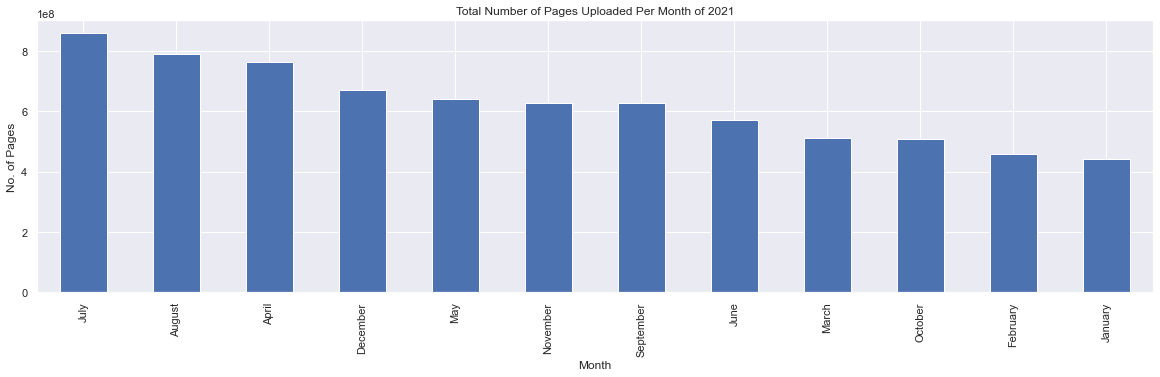

In [141]:
month_page_count.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("No. of Pages")
plt.title("Total Number of Pages Uploaded Per Month of 2021")
plt.savefig('s2_month_sum_page_count.jpg')
plt.show()

The top three months from an averages prespective are the same

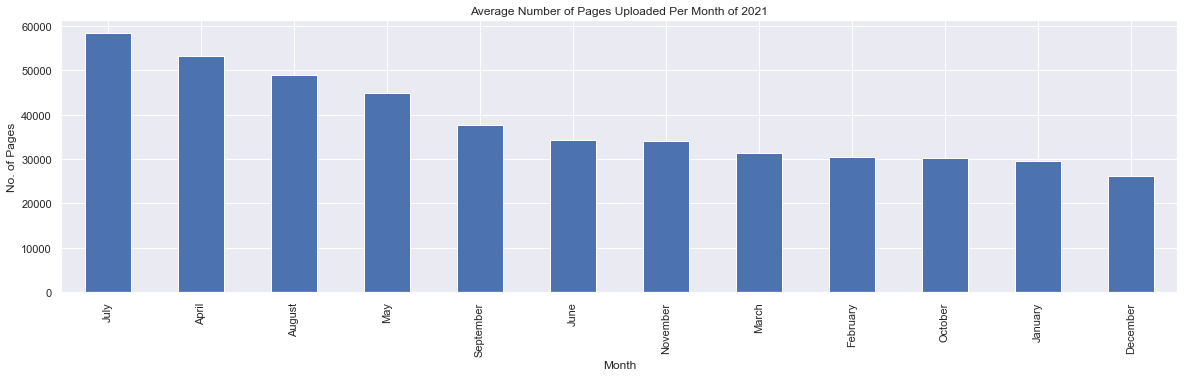

In [70]:
started_at_page_count.groupby("month_name")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("No. of Pages")
plt.title("Average Number of Pages Uploaded Per Month of 2021")
plt.savefig('s2b_month_avg_page_count.jpg')
plt.show()

In [71]:
started_at_page_count.groupby("day_of_week")["page_count"].sum().sort_values(ascending=False)

day_of_week
Friday       1673225991
Wednesday    1646247867
Tuesday      1253939750
Thursday     1227945341
Monday        769884786
Saturday      678766259
Sunday        218353554
Name: page_count, dtype: int64

In [72]:
day_of_week_page_count = started_at_page_count.groupby("day_of_week")["page_count"].sum().sort_values(ascending=False)

In [73]:
day_of_week_page_count

day_of_week
Friday       1673225991
Wednesday    1646247867
Tuesday      1253939750
Thursday     1227945341
Monday        769884786
Saturday      678766259
Sunday        218353554
Name: page_count, dtype: int64

### Total Page Count Uploaded Across Each Day
**Friday and Wednesday have the most pages uploaded.**

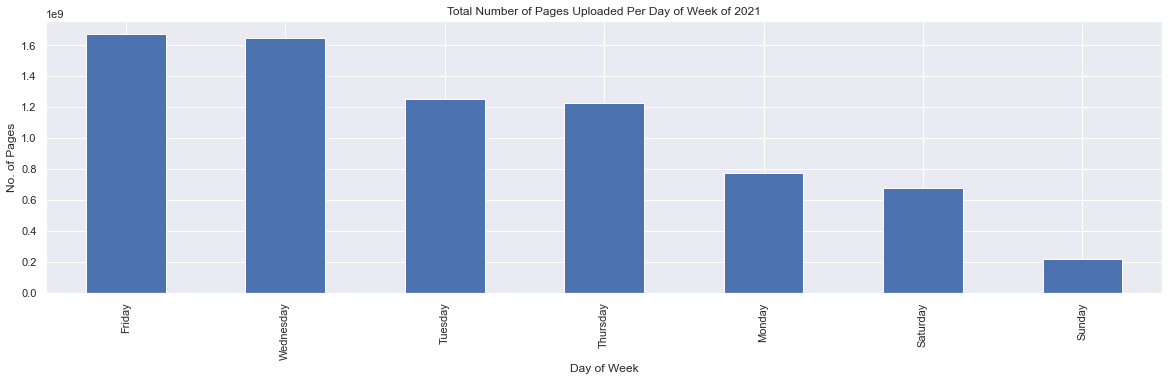

In [74]:
day_of_week_page_count.plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("No. of Pages")
plt.title("Total Number of Pages Uploaded Per Day of Week of 2021")
plt.savefig('s3_dayofweek_sum_page_count.jpg')
plt.show()

### Average Page Count Uploaded Across Each Day
**Although Saturday has a high average number of pages uploaded, it's total number uploaded is smaller. However Friday ranks second in terms of averages. Thus strengthening the case that Friday is a Prime Time day in terms of number of pages uploaded.** 

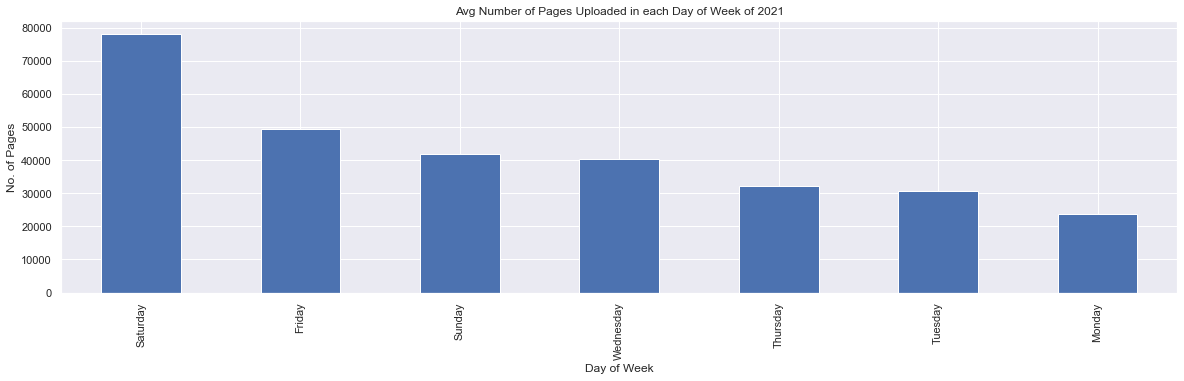

In [102]:
started_at_page_count.groupby("day_of_week")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("No. of Pages")
plt.title("Avg Number of Pages Uploaded in each Day of Week of 2021")
plt.savefig('s3b_dayofweek_avg_page_count.jpg')
plt.show()

### Total Page Count Uploaded Across Each Hour
**Next, let's identify in what hour are the most pages uploaded.**

In [76]:
started_at_page_count.groupby("hour")["page_count"].sum()

hour
00:00    443118017
01:00    387017909
02:00    348721086
03:00    215001007
04:00    168690788
05:00    118848402
06:00    248736250
07:00     98569845
08:00     76279100
09:00    118458381
10:00    147344416
11:00    139289931
12:00    142282482
13:00    237938118
14:00    683297528
15:00    345364732
16:00    364645344
17:00    446048759
18:00    432622151
19:00    483970704
20:00    428022104
21:00    536055103
22:00    471137875
23:00    386903516
Name: page_count, dtype: int64

In [77]:
hour_page_count = started_at_page_count.groupby("hour")["page_count"].sum()

In [78]:
hour_page_count.sort_values(ascending=False)

hour
14:00    683297528
21:00    536055103
19:00    483970704
22:00    471137875
17:00    446048759
00:00    443118017
18:00    432622151
20:00    428022104
01:00    387017909
23:00    386903516
16:00    364645344
02:00    348721086
15:00    345364732
06:00    248736250
13:00    237938118
03:00    215001007
04:00    168690788
10:00    147344416
12:00    142282482
11:00    139289931
05:00    118848402
09:00    118458381
07:00     98569845
08:00     76279100
Name: page_count, dtype: int64

**1400 (2pm) and 2100 (9pm) are identified as the hours in which the largest volume of pages are uploaded.**

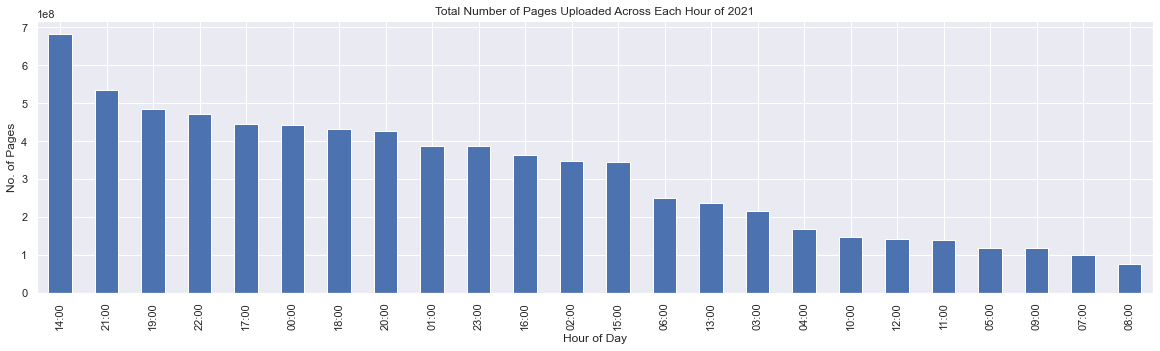

In [79]:
hour_page_count.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages")
plt.title("Total Number of Pages Uploaded Across Each Hour of 2021")
plt.savefig('s4_hour_sum_page_count.jpg')
plt.show()

### Average Page Count Uploaded Across Each Hour
**1400 (2pm) is in the upper percentile in the average category, ranking 8 out of 24. However, 2100 (9pm) is not.**

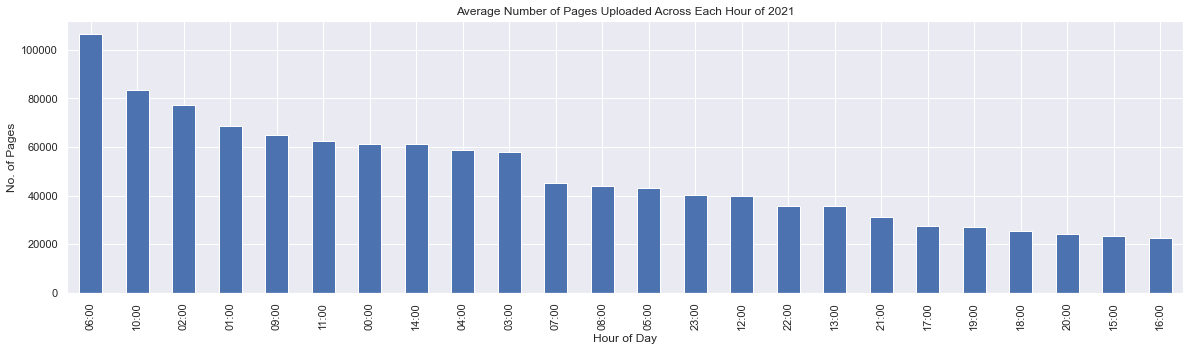

In [101]:
started_at_page_count.groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages")
plt.title("Average Number of Pages Uploaded Across Each Hour of 2021")
plt.savefig('s4b_hour_avg_page_count.jpg')
plt.show()

### Next, taking an observation of day of year, there are specific days of the year in 2021 when a large number of pages are uploaded. 

In [81]:
started_at_page_count.groupby("day")["page_count"].sum()

day
2021-01-01      493424
2021-01-02     2993618
2021-01-03       49948
2021-01-04     3705873
2021-01-05     3363817
                ...   
2021-12-28    27579579
2021-12-29    11428881
2021-12-30    31036333
2021-12-31     1565048
2022-01-01      776531
Name: page_count, Length: 366, dtype: int64

In [82]:
day_of_year_page_count = started_at_page_count.groupby("day")["page_count"].sum()

There is a very large number of pages uploaded at the very end of April. This could be why April is the highest ranking month of the year.

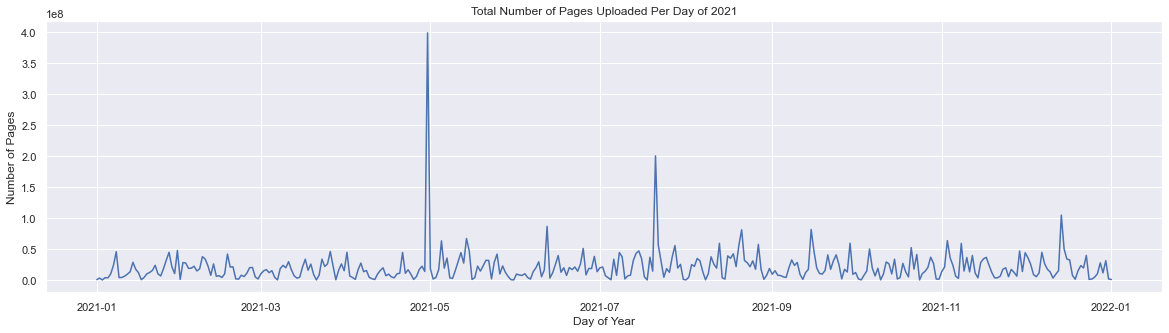

In [83]:
day_of_year_page_count.plot(kind='line')
plt.xlabel("Day of Year")
plt.ylabel("Number of Pages")
plt.title("Total Number of Pages Uploaded Per Day of 2021")
plt.savefig('per_day_line_page_count.jpg')
plt.show()

# The above includes macro trends. Now, let's observe micro trends

Micro Trend Questions to answer: 

Sanity Check: What are the top days (for pages uploaded) across the top months of July, August, and April (keeping an eye on Friday and Wednesday, are they consistent? The answer is yes, observed in the visuals below)

What are the overall PrimeTime hours across the top days of Friday and Wednesday?

What are the top PrimeTime hours across Fri and Wed specifically in July, August, and April?

Let's aggregate the total number of pages in each day of the week for each month of 2021. This will show us where the most number of uploads transpired according to the day of the week in each month.

In [84]:
started_at_page_count.groupby(["month_name","day_of_week"])["page_count"].sum()

month_name  day_of_week
April       Friday         434537808
            Monday          41180119
            Saturday        20212226
            Sunday           5694877
            Thursday        91096591
                             ...    
September   Saturday        51168166
            Sunday          17052598
            Thursday       125015575
            Tuesday         89939318
            Wednesday      198976168
Name: page_count, Length: 84, dtype: int64

The Top 3 Micro Trends in this subset are
1. Fridays in April
2. Wednesdays in July
3. Fridays in August

**You will also notice that Friday and Wendesday are consistently high ranking day of the week across several months**

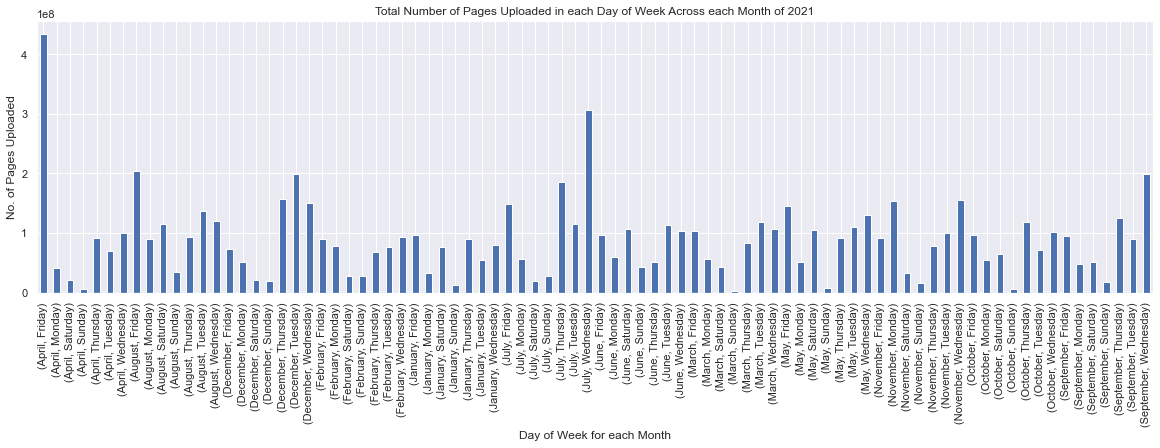

In [85]:
started_at_page_count.groupby(["month_name","day_of_week"])["page_count"].sum().plot(kind='bar')
plt.xlabel("Day of Week for each Month")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Number of Pages Uploaded in each Day of Week Across each Month of 2021")
plt.savefig('day_of_week_month_name_sum_page_count.jpg')
plt.show()

# Top Number of Pages uploaded are observed over April, July, and August. 

In [86]:
july_august_april = started_at_page_count["month_name"].isin(["July","August","April"])
started_at_page_count[july_august_april]

,started_at,page_count,day_of_week,month_name,hour,day
0,2021-04-15 19:47:01,4,Thursday,April,19:00,2021-04-15
7,2021-07-15 18:45:26,378465,Thursday,July,18:00,2021-07-15
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
18,2021-08-27 20:18:11,312,Friday,August,20:00,2021-08-27
21,2021-07-02 17:06:48,916,Friday,July,17:00,2021-07-02
...,...,...,...,...,...,...
199980,2021-07-27 16:06:45,271,Tuesday,July,16:00,2021-07-27
199983,2021-04-22 18:57:47,77,Thursday,April,18:00,2021-04-22
199988,2021-04-16 06:06:52,3149,Friday,April,06:00,2021-04-16
199990,2021-07-12 16:04:30,2047,Monday,July,16:00,2021-07-12


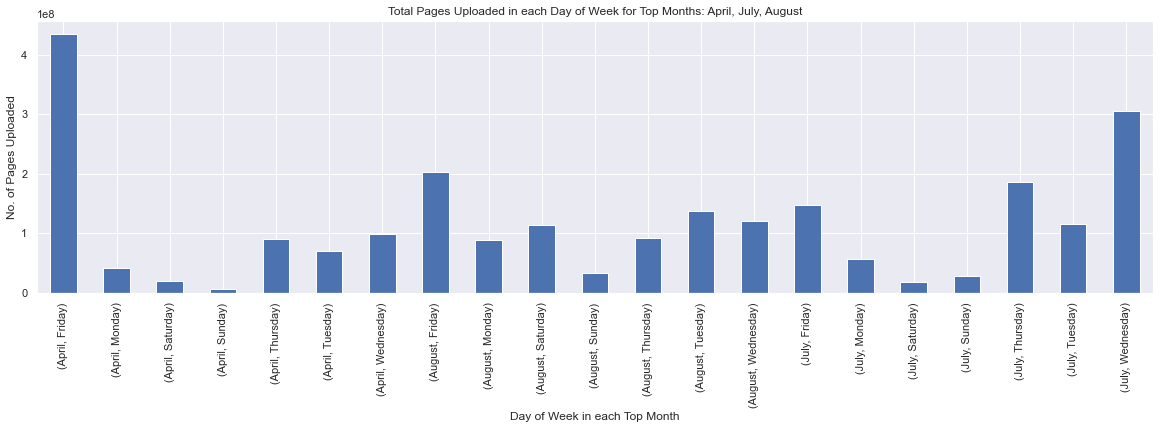

In [136]:
started_at_page_count[july_august_april].groupby(["month_name","day_of_week"])["page_count"].sum().plot(kind='bar')
plt.xlabel("Day of Week in each Top Month")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Pages Uploaded in each Day of Week for Top Months: April, July, August")
plt.savefig('s8c_day_of_week_topmonths_sum_page_count.jpg', bbox_inches="tight")
plt.show()
#include in slide 8

In [137]:
started_at_page_count[july_august_april].groupby(["month_name","day_of_week"])["page_count"].sum()

month_name  day_of_week
April       Friday         434537808
            Monday          41180119
            Saturday        20212226
            Sunday           5694877
            Thursday        91096591
            Tuesday         70047162
            Wednesday       99383011
August      Friday         203385924
            Monday          89001618
            Saturday       114429110
            Sunday          34104195
            Thursday        92419868
            Tuesday        136686818
            Wednesday      120042369
July        Friday         147943940
            Monday          56929801
            Saturday        18680604
            Sunday          28145902
            Thursday       186096512
            Tuesday        115424983
            Wednesday      305709506
Name: page_count, dtype: int64

### IMPORTANT Sanity Check via a closer zoom in on top months (April, July, August)

Friday in April (top preforming day of week in April)

Wednesday in July (top preforming day of week in July)

Friday in August (top preforming day of week in August)

In [88]:
july_august_april = started_at_page_count["month_name"].isin(["July","August","April"])
df_jaa = started_at_page_count[july_august_april]
df_jaa

,started_at,page_count,day_of_week,month_name,hour,day
0,2021-04-15 19:47:01,4,Thursday,April,19:00,2021-04-15
7,2021-07-15 18:45:26,378465,Thursday,July,18:00,2021-07-15
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
18,2021-08-27 20:18:11,312,Friday,August,20:00,2021-08-27
21,2021-07-02 17:06:48,916,Friday,July,17:00,2021-07-02
...,...,...,...,...,...,...
199980,2021-07-27 16:06:45,271,Tuesday,July,16:00,2021-07-27
199983,2021-04-22 18:57:47,77,Thursday,April,18:00,2021-04-22
199988,2021-04-16 06:06:52,3149,Friday,April,06:00,2021-04-16
199990,2021-07-12 16:04:30,2047,Monday,July,16:00,2021-07-12


In [89]:
wed_fri = df_jaa["day_of_week"].isin(["Wednesday","Friday"])
julyw_augustf_aprilf = df_jaa[wed_fri]
julyw_augustf_aprilf

,started_at,page_count,day_of_week,month_name,hour,day
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
18,2021-08-27 20:18:11,312,Friday,August,20:00,2021-08-27
21,2021-07-02 17:06:48,916,Friday,July,17:00,2021-07-02
40,2021-08-04 18:11:23,881,Wednesday,August,18:00,2021-08-04
46,2021-08-18 18:53:22,8,Wednesday,August,18:00,2021-08-18
...,...,...,...,...,...,...
199951,2021-08-20 20:29:50,189,Friday,August,20:00,2021-08-20
199959,2021-07-30 22:18:00,104,Friday,July,22:00,2021-07-30
199966,2021-04-28 19:24:54,2212,Wednesday,April,19:00,2021-04-28
199988,2021-04-16 06:06:52,3149,Friday,April,06:00,2021-04-16


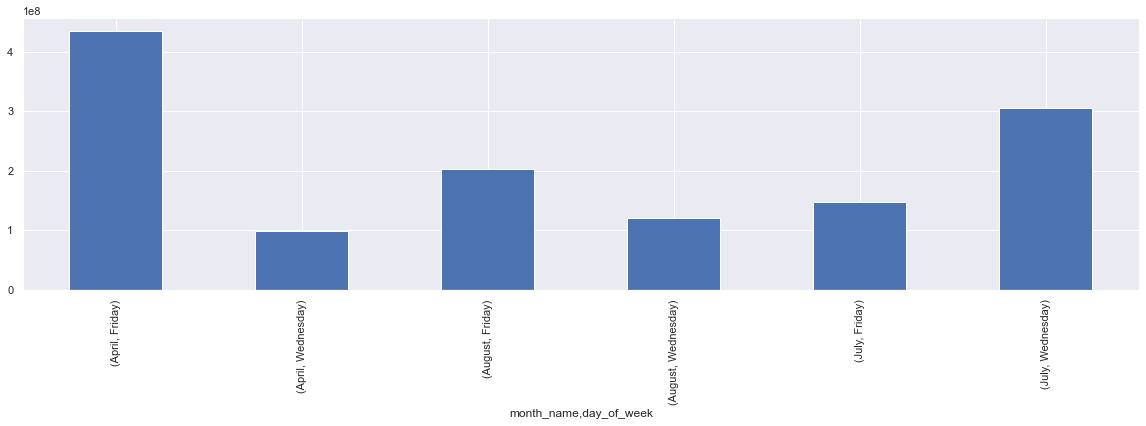

In [90]:
julyw_augustf_aprilf.groupby(["month_name","day_of_week"])["page_count"].sum().plot(kind='bar')
plt.show()

## Friday PrimeTime Hours
**This is Friday PrimeTime hours assessed immaterial of the month. Friday is a peak day across the entire year**

In [91]:
friday = started_at_page_count["day_of_week"].isin(["Friday"])
started_at_page_count[friday]

,started_at,page_count,day_of_week,month_name,hour,day
1,2021-11-12 14:54:45,27,Friday,November,14:00,2021-11-12
12,2021-11-05 18:51:06,108098,Friday,November,18:00,2021-11-05
13,2021-12-17 16:39:01,5,Friday,December,16:00,2021-12-17
16,2021-09-03 19:28:13,2,Friday,September,19:00,2021-09-03
17,2021-10-22 19:37:47,885,Friday,October,19:00,2021-10-22
...,...,...,...,...,...,...
199960,2021-11-12 18:43:50,942,Friday,November,18:00,2021-11-12
199961,2021-11-19 19:08:51,10665,Friday,November,19:00,2021-11-19
199974,2021-10-15 15:37:17,69363,Friday,October,15:00,2021-10-15
199988,2021-04-16 06:06:52,3149,Friday,April,06:00,2021-04-16


### Total Pages Uploaded on Friday Across each Hour

In [92]:
started_at_page_count[friday].groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
14:00    455661634
19:00     89408746
20:00     89380008
21:00     88067437
18:00     79527647
01:00     78676638
17:00     78579239
16:00     70880612
22:00     68546708
11:00     65243086
02:00     63298607
06:00     62740160
15:00     60878009
00:00     53778790
13:00     47545553
12:00     35531620
03:00     30834878
23:00     29653082
10:00     25735326
07:00     25266163
08:00     21308203
05:00     19542483
04:00     19088712
09:00     14052650
Name: page_count, dtype: int64

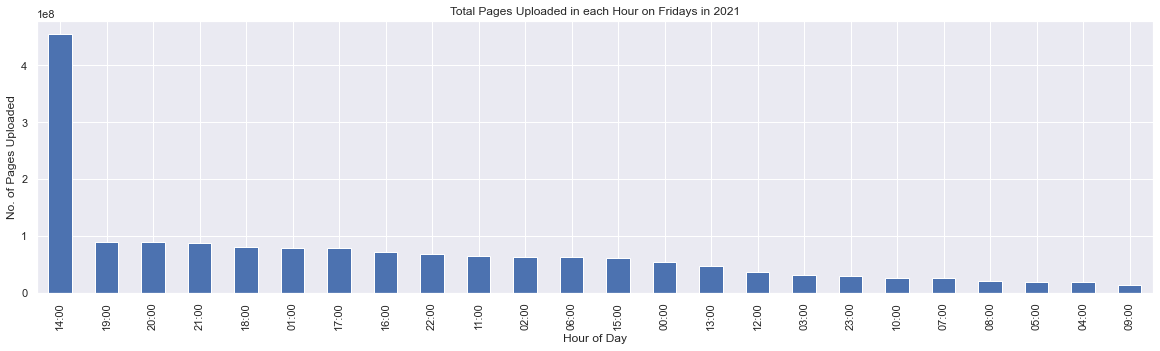

In [93]:
started_at_page_count[friday].groupby("hour")["page_count"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Pages Uploaded in each Hour on Fridays in 2021")
plt.savefig('s5_fridays_hours_sum_page_count.jpg')
plt.show()

### Average Number of Pages Uploaded on Friday Across each Hour

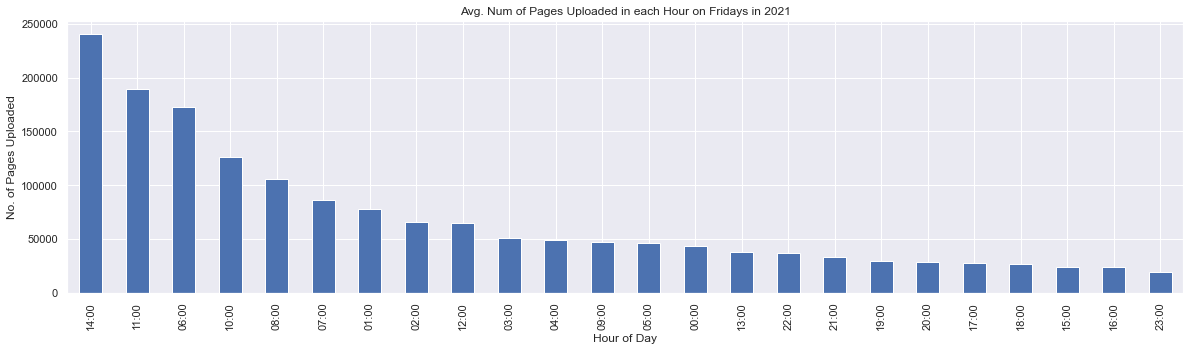

In [100]:
started_at_page_count[friday].groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Avg. Num of Pages Uploaded in each Hour on Fridays in 2021")
plt.savefig('s5b_fridays_hours_sum_page_count.jpg')
plt.show()

# Recommendation

### Friday is identified as the busiest day of the week in terms of uploads based on the number of pages. the 2pm-3pm time block has the highest total number of pages (sum of pages) and average number of pages per upload. Thus, the recommendation is to put on extra servers on Friday from 2pm-3pm.

## Wednesday PrimeTime Hours
**This is Wednesday PrimeTime hours assessed immaterial of the month. Wednesday is the second ranking peak day for total pages uploaded across the entire year**

In [106]:
wednesday = started_at_page_count["day_of_week"].isin(["Wednesday"])
started_at_page_count[wednesday]

,started_at,page_count,day_of_week,month_name,hour,day
2,2021-03-10 10:08:44,1,Wednesday,March,10:00,2021-03-10
4,2021-03-24 21:50:29,87,Wednesday,March,21:00,2021-03-24
6,2021-11-10 16:09:06,8957,Wednesday,November,16:00,2021-11-10
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
23,2021-06-09 02:49:56,33284,Wednesday,June,02:00,2021-06-09
...,...,...,...,...,...,...
199985,2021-02-17 16:11:10,686,Wednesday,February,16:00,2021-02-17
199986,2021-09-01 14:49:35,1,Wednesday,September,14:00,2021-09-01
199989,2021-01-13 21:58:58,247,Wednesday,January,21:00,2021-01-13
199991,2021-01-06 21:01:29,29,Wednesday,January,21:00,2021-01-06


### Total Pages Uploaded on Wednesday Across each Hour

In [107]:
started_at_page_count[wednesday].groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
00:00    215464104
23:00    148123745
22:00    134596502
16:00    127285878
19:00    107526288
21:00    100128552
20:00     99926480
18:00     95428261
15:00     85745553
14:00     80839382
17:00     77027406
02:00     71170558
01:00     56887448
13:00     37543953
12:00     34525417
04:00     24858608
10:00     24706086
11:00     23430500
03:00     20184708
05:00     19753989
06:00     18556900
08:00     17735950
07:00     16880116
09:00      7921483
Name: page_count, dtype: int64

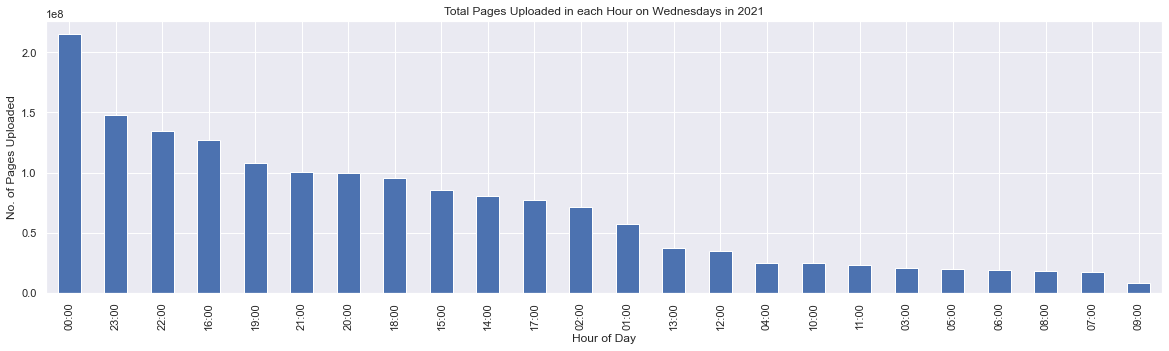

In [97]:
started_at_page_count[wednesday].groupby("hour")["page_count"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Pages Uploaded in each Hour on Wednesdays in 2021")
plt.savefig('s6_wednesays_hours_sum_page_count.jpg')
plt.show()


### Average Number of Pages Uploaded on Wednesday Across each Hour

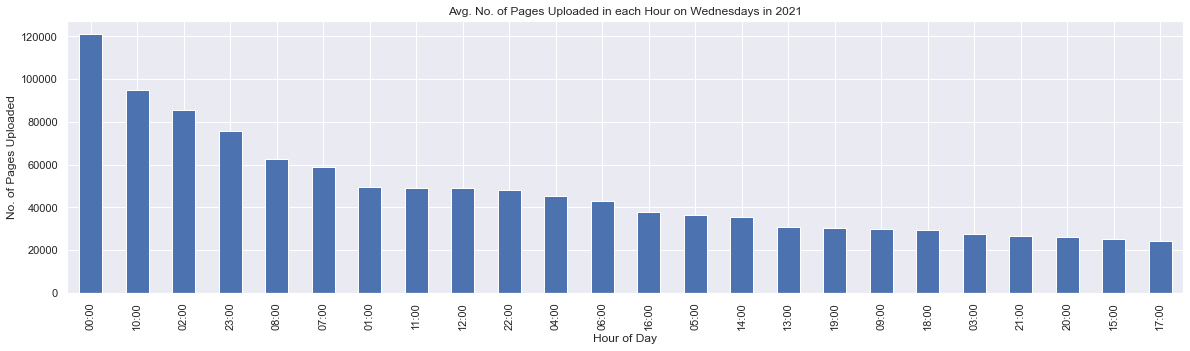

In [99]:
started_at_page_count[wednesday].groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Avg. No. of Pages Uploaded in each Hour on Wednesdays in 2021")
plt.savefig('s6b_wednesays_hours_sum_page_count.jpg')
plt.show()

### Wednesday is identified as the 2nd busiest day of the week in terms of uploads based on the number of pages. the 12am-1am time block has the highest total number of pages (sum of pages) and average number of pages uploaded on Wednesday. Thus, the recommendation is to put on extra servers on Wednesday from 12am-1am.

Top Days of the Year 2021 (after sanity checks) are identified as:
    
    Fridays in April
    Wednesdays in July
    Fridays in August
    
We will identify the PrimeTime Hours for each of those periods to submit micro recommendation.

### Total & Avg Pages Uploaded on Fridays in April Across each Hour

In [103]:
friday = started_at_page_count["day_of_week"].isin(["Friday"])
friday_df = started_at_page_count[friday]
friday_df

,started_at,page_count,day_of_week,month_name,hour,day
1,2021-11-12 14:54:45,27,Friday,November,14:00,2021-11-12
12,2021-11-05 18:51:06,108098,Friday,November,18:00,2021-11-05
13,2021-12-17 16:39:01,5,Friday,December,16:00,2021-12-17
16,2021-09-03 19:28:13,2,Friday,September,19:00,2021-09-03
17,2021-10-22 19:37:47,885,Friday,October,19:00,2021-10-22
...,...,...,...,...,...,...
199960,2021-11-12 18:43:50,942,Friday,November,18:00,2021-11-12
199961,2021-11-19 19:08:51,10665,Friday,November,19:00,2021-11-19
199974,2021-10-15 15:37:17,69363,Friday,October,15:00,2021-10-15
199988,2021-04-16 06:06:52,3149,Friday,April,06:00,2021-04-16


In [104]:
fridays_in_april = friday_df["month_name"].isin(["April"])
fridays_in_april_df = friday_df[fridays_in_april]
fridays_in_april_df

,started_at,page_count,day_of_week,month_name,hour,day
285,2021-04-30 20:30:04,1,Friday,April,20:00,2021-04-30
313,2021-04-23 20:45:29,175,Friday,April,20:00,2021-04-23
334,2021-04-23 14:49:33,11591,Friday,April,14:00,2021-04-23
392,2021-04-23 17:34:16,292,Friday,April,17:00,2021-04-23
564,2021-04-16 18:42:11,579,Friday,April,18:00,2021-04-16
...,...,...,...,...,...,...
199757,2021-04-23 19:00:43,14,Friday,April,19:00,2021-04-23
199767,2021-04-23 13:53:20,4,Friday,April,13:00,2021-04-23
199786,2021-04-16 15:29:10,308,Friday,April,15:00,2021-04-16
199881,2021-04-23 13:59:12,27,Friday,April,13:00,2021-04-23


In [108]:
fridays_in_april_df.groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
14:00    394427641
18:00      6165476
20:00      5875837
17:00      5524670
13:00      4405141
15:00      4341472
16:00      3576003
21:00      2870940
19:00      2517374
22:00      1694119
01:00       900952
00:00       563930
02:00       515530
05:00       424529
23:00       277338
03:00       200736
04:00        99712
12:00        61653
10:00        34945
07:00        19492
06:00        18212
09:00        13872
08:00         5249
11:00         2985
Name: page_count, dtype: int64

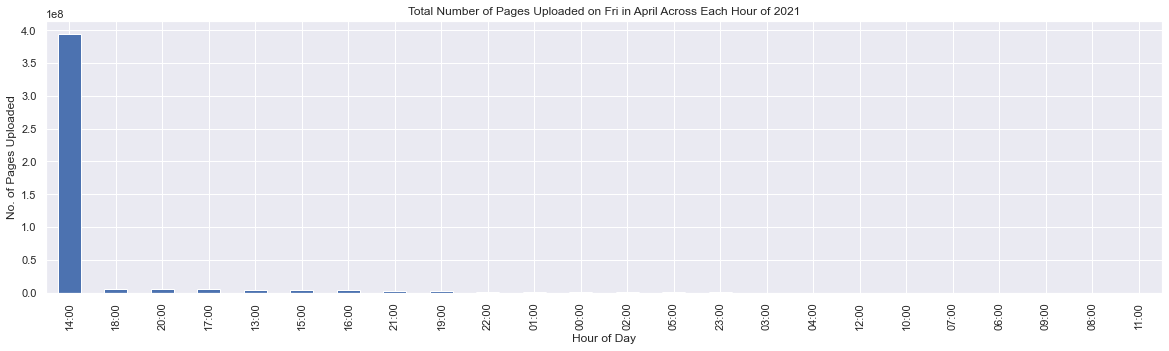

In [109]:
fridays_in_april_df.groupby("hour")["page_count"].sum().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Number of Pages Uploaded on Fri in April Across Each Hour of 2021")
plt.savefig('s7_fridays_april_2pmhours_sum_page_count.jpg')
plt.show()

In [138]:
fridays_in_april_df.groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
14:00    394427641
18:00      6165476
20:00      5875837
17:00      5524670
13:00      4405141
15:00      4341472
16:00      3576003
21:00      2870940
19:00      2517374
22:00      1694119
01:00       900952
00:00       563930
02:00       515530
05:00       424529
23:00       277338
03:00       200736
04:00        99712
12:00        61653
10:00        34945
07:00        19492
06:00        18212
09:00        13872
08:00         5249
11:00         2985
Name: page_count, dtype: int64

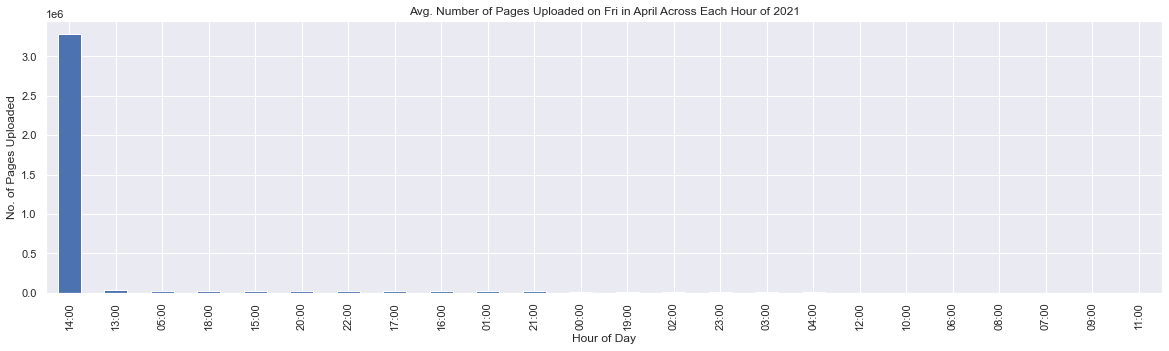

In [110]:
fridays_in_april_df.groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Avg. Number of Pages Uploaded on Fri in April Across Each Hour of 2021")
plt.savefig('s7b_fridays_april_2pmhours_avg_page_count.jpg')
plt.show()

### Total & Avg Pages Uploaded on Wednesday in July Across each Hour

In [111]:
wednesday = started_at_page_count["day_of_week"].isin(["Wednesday"])
wednesday_df = started_at_page_count[wednesday]
wednesday_df

,started_at,page_count,day_of_week,month_name,hour,day
2,2021-03-10 10:08:44,1,Wednesday,March,10:00,2021-03-10
4,2021-03-24 21:50:29,87,Wednesday,March,21:00,2021-03-24
6,2021-11-10 16:09:06,8957,Wednesday,November,16:00,2021-11-10
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
23,2021-06-09 02:49:56,33284,Wednesday,June,02:00,2021-06-09
...,...,...,...,...,...,...
199985,2021-02-17 16:11:10,686,Wednesday,February,16:00,2021-02-17
199986,2021-09-01 14:49:35,1,Wednesday,September,14:00,2021-09-01
199989,2021-01-13 21:58:58,247,Wednesday,January,21:00,2021-01-13
199991,2021-01-06 21:01:29,29,Wednesday,January,21:00,2021-01-06


In [112]:
wednesdays_in_july = wednesday_df["month_name"].isin(["July"])
wednesdays_in_july_df = wednesday_df[wednesdays_in_july]
wednesdays_in_july_df

,started_at,page_count,day_of_week,month_name,hour,day
10,2021-07-28 17:49:02,976,Wednesday,July,17:00,2021-07-28
129,2021-07-07 13:29:36,80,Wednesday,July,13:00,2021-07-07
281,2021-07-28 03:54:31,89,Wednesday,July,03:00,2021-07-28
333,2021-07-28 17:54:29,499,Wednesday,July,17:00,2021-07-28
349,2021-07-07 15:17:05,19812,Wednesday,July,15:00,2021-07-07
...,...,...,...,...,...,...
199626,2021-07-21 19:25:48,4351,Wednesday,July,19:00,2021-07-21
199798,2021-07-07 15:23:04,27507,Wednesday,July,15:00,2021-07-07
199831,2021-07-28 16:20:51,201,Wednesday,July,16:00,2021-07-28
199838,2021-07-21 20:53:47,19,Wednesday,July,20:00,2021-07-21


In [113]:
wednesdays_in_july_df.groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
00:00    157773500
18:00     27756581
19:00     25125297
14:00     20263816
23:00     19593050
12:00     12968019
21:00     11716793
01:00      4122893
22:00      4027920
17:00      3978074
20:00      3415073
15:00      3215253
16:00      2762091
02:00      2362445
06:00      2190979
03:00      1788159
04:00      1431877
13:00       737411
09:00       285636
10:00       194227
11:00          396
08:00            8
05:00            6
07:00            2
Name: page_count, dtype: int64

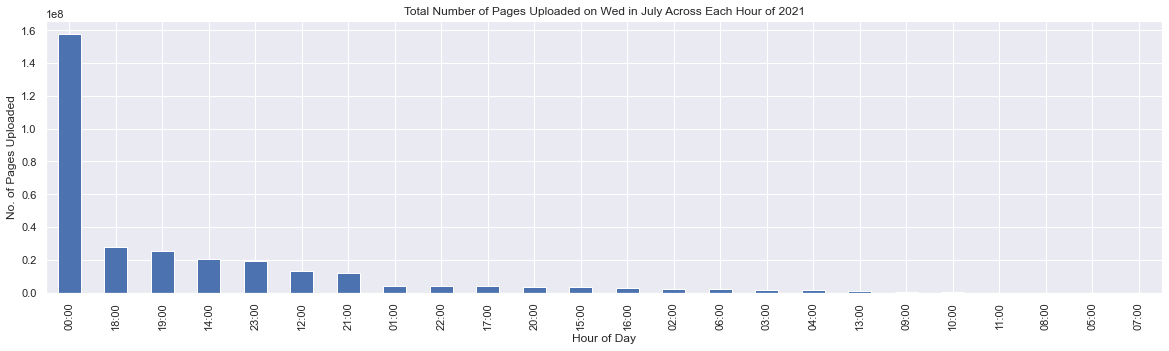

In [114]:
wednesdays_in_july_df.groupby("hour")["page_count"].sum().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Number of Pages Uploaded on Wed in July Across Each Hour of 2021")
plt.savefig('s9_wednesdays_july_midnighthours_sum_page_count.jpg')
plt.show()

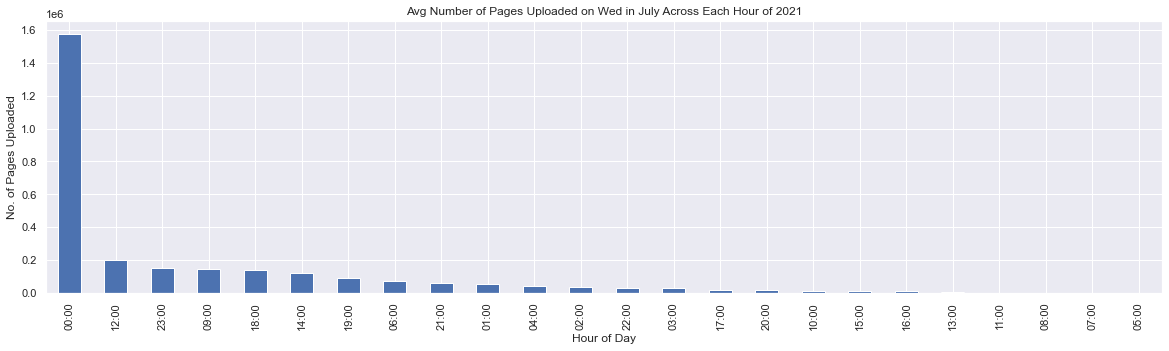

In [115]:
wednesdays_in_july_df.groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Avg Number of Pages Uploaded on Wed in July Across Each Hour of 2021")
plt.savefig('s9b_wednesdays_july_midnighthours_sum_page_count.jpg')
plt.show()

### Total & Avg Pages Uploaded on Fridays in August Across each Hour

In [116]:
fridays_in_august = friday_df["month_name"].isin(["August"])
fridays_in_august_df = friday_df[fridays_in_august]
fridays_in_august_df

,started_at,page_count,day_of_week,month_name,hour,day
18,2021-08-27 20:18:11,312,Friday,August,20:00,2021-08-27
76,2021-08-06 18:23:30,149956,Friday,August,18:00,2021-08-06
100,2021-08-27 20:02:59,357,Friday,August,20:00,2021-08-27
133,2021-08-27 06:53:41,1,Friday,August,06:00,2021-08-27
200,2021-08-06 01:13:23,2870,Friday,August,01:00,2021-08-06
...,...,...,...,...,...,...
199647,2021-08-27 20:34:36,1,Friday,August,20:00,2021-08-27
199742,2021-08-13 21:42:55,4,Friday,August,21:00,2021-08-13
199810,2021-08-20 19:19:05,221,Friday,August,19:00,2021-08-20
199943,2021-08-20 19:10:10,136,Friday,August,19:00,2021-08-20


In [117]:
fridays_in_august_df.groupby("hour")["page_count"].sum().sort_values(ascending=False)

hour
01:00    33548426
14:00    32841268
18:00    32053888
22:00    24377765
20:00    18706691
21:00    14449442
03:00    12575767
17:00     7506238
16:00     4066037
06:00     3958397
08:00     3808542
15:00     3795997
02:00     2679316
00:00     2195600
19:00     1787858
05:00     1403142
13:00     1167880
23:00     1092331
10:00      820108
04:00      369718
11:00      176093
09:00        5222
12:00         192
07:00           6
Name: page_count, dtype: int64

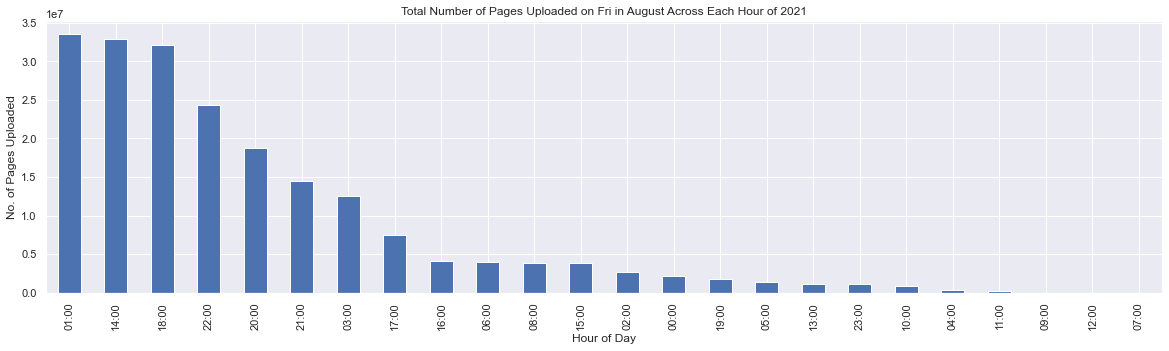

In [118]:
fridays_in_august_df.groupby("hour")["page_count"].sum().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Total Number of Pages Uploaded on Fri in August Across Each Hour of 2021")
plt.savefig('s10_Fridays_august_1am_sum_page_count.jpg')
plt.show()

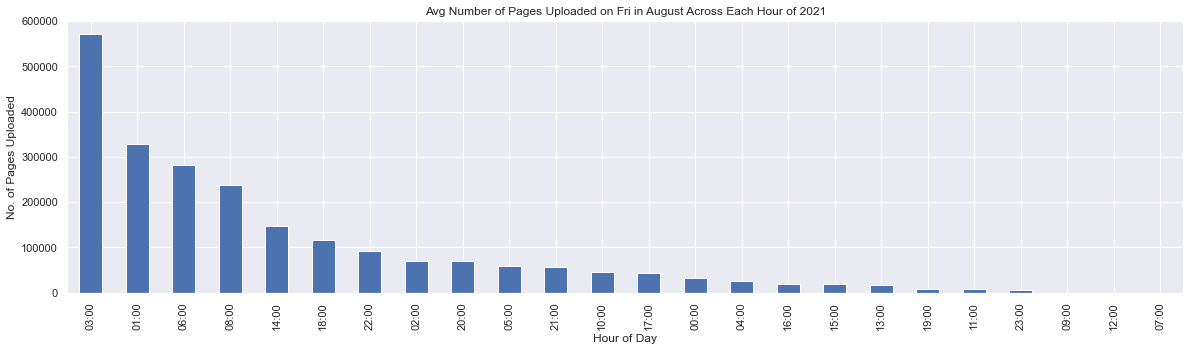

In [119]:
fridays_in_august_df.groupby("hour")["page_count"].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("Hour of Day")
plt.ylabel("No. of Pages Uploaded")
plt.title("Avg Number of Pages Uploaded on Fri in August Across Each Hour of 2021")
plt.savefig('s10b_Fridays_august_1am_avg_page_count.jpg')
plt.show()

Fridays in August are a practical anomoly in our analysis. 1am is the busy hour showing up consistently in the top total and top average. The recommendation is already to put extra servers on every Friday at 2pm. However, in August, the recommendation is to also put on extra servers at the peak hour of 1am. 

**below are simply basic sanity checks I preformed with page_count values, before doing the bonus challenge**

# Visualizing Page Count

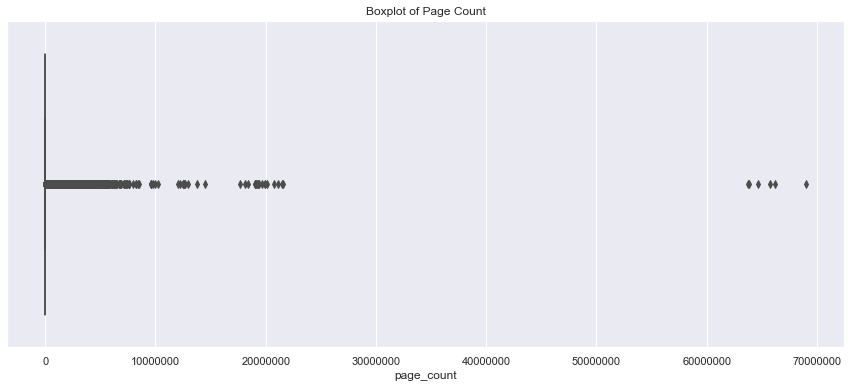

In [80]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='page_count', data=df_uploads_file)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Page Count')
plt.show()

In [81]:
df_uploads_file['page_count']

0            4
1           27
2            1
3            1
4           87
          ... 
199995     929
199996     656
199997    1867
199998       3
199999      16
Name: page_count, Length: 200000, dtype: int64

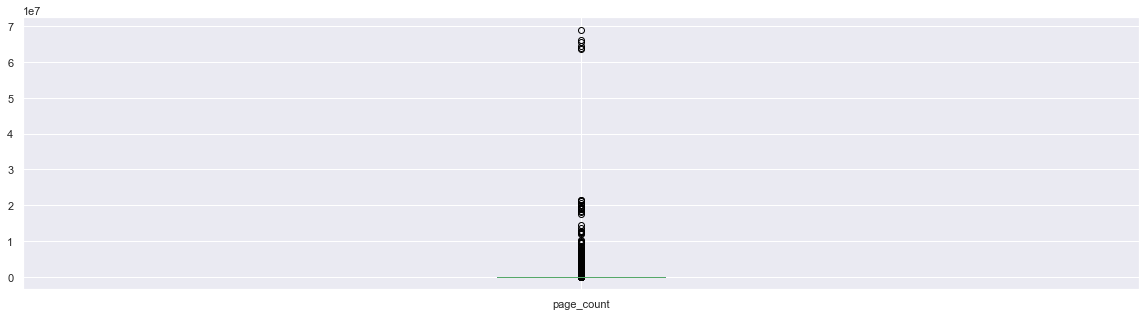

In [82]:
df_uploads_file['page_count'].plot(kind='box')
plt.show()

Let's try to observe under 10M

In [83]:
df_uploads_file_below_10M = df_uploads_file[(df_uploads_file['page_count']<10000000)]

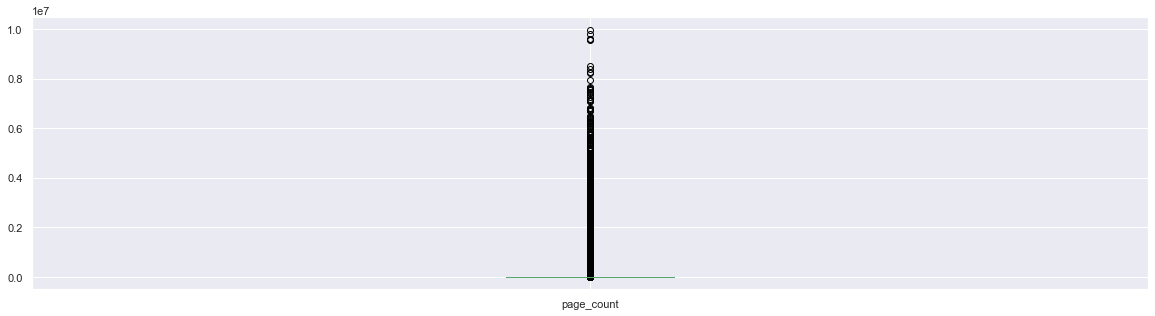

In [84]:
df_uploads_file_below_10M['page_count'].plot(kind='box')
plt.show()

In [89]:
df_uploads_file_below_10M_above10k = df_uploads_file_below_10M[(df_uploads_file_below_10M['page_count']>10000)]

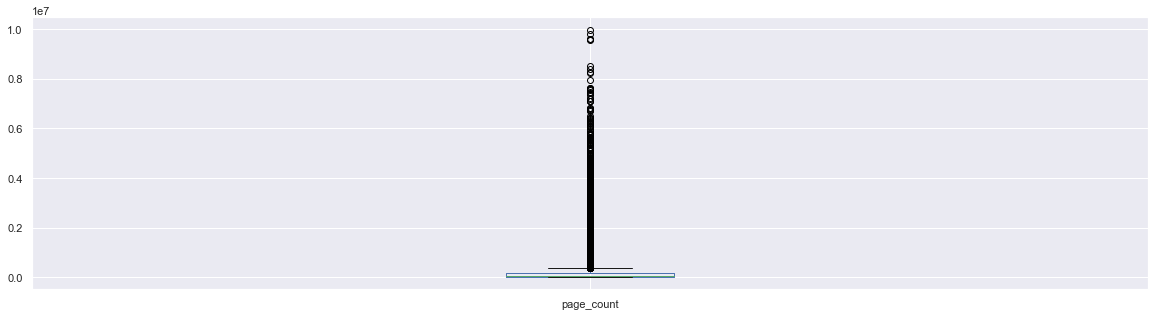

In [90]:
df_uploads_file_below_10M_above10k['page_count'].plot(kind='box')
plt.show()

from my prospective, the data seems to be so far ranging in terms of distribution. both file size and page_count. there are some extremely large files, however at rather varying degrees...more analysis can be conducted to furhter drill in on the total range of distribution...however I will end at a stopping point here, for the sake of this analysis challenge.

# Bonus, Optional Challenge

Next, we are going to generally explore the data from an account level prospective. I would love to discover what customers have the largest total number of pages uploaded throughout the year. who are our volume producers in the page_count category

In [120]:
u = df_uploads_file

In [121]:
u = u.rename(columns={'id':'upload_id'})
u

,upload_id,created_at,updated_at,project_id,deleted_at,started_at,ended_at,size,document_count,page_count,upload_time,seconds
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4,0 days 00:00:36,36.0
1,347163,2021-11-12 14:30:01,2021-11-12 14:56:21,679618,NaT,2021-11-12 14:54:45,2021-11-12 14:55:59,2563859,25,27,0 days 00:01:14,74.0
2,347166,2021-03-10 10:08:41,2021-03-10 10:10:07,571057,2021-03-10 10:10:07,2021-03-10 10:08:44,2021-03-10 10:09:18,846,1,1,0 days 00:00:34,34.0
3,347168,2021-02-22 06:08:42,2021-02-22 06:10:04,566933,2021-02-22 06:10:04,2021-02-22 06:08:45,2021-02-22 06:09:13,833,1,1,0 days 00:00:28,28.0
4,347169,2021-03-24 21:50:23,2021-03-24 21:58:09,574136,2021-03-24 21:58:09,2021-03-24 21:50:29,2021-03-24 21:52:37,6190706,30,87,0 days 00:02:08,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,947735,2021-07-16 21:27:23,2021-07-16 21:28:27,82885,NaT,2021-07-16 21:27:23,2021-07-16 21:28:16,110222442,348,929,0 days 00:00:53,53.0
199996,947738,2021-11-18 16:42:32,2021-11-18 16:49:36,681258,NaT,2021-11-18 16:48:15,2021-11-18 16:49:33,24346529,90,656,0 days 00:01:18,78.0
199997,947739,2021-02-12 21:53:05,2021-02-13 00:18:13,680635,NaT,2021-02-13 00:13:30,2021-02-13 00:17:51,164216540,858,1867,0 days 00:04:21,261.0
199998,947744,2021-01-27 21:16:29,2021-01-27 21:30:09,627862,NaT,2021-01-27 21:29:23,2021-01-27 21:30:07,92930,1,3,0 days 00:00:44,44.0


In [122]:
p = pd.read_json(projects_file, lines=True)


In [123]:
p = p.rename(columns={'id':'project_id'})
p

,project_id,account_id,created_at,updated_at,deleted_at
0,658014,11340,2014-08-18 15:49:24,2022-02-19 22:00:03,NaT
1,679720,11370,2015-06-30 14:44:49,2022-03-31 13:58:52,NaT
2,156383,22234,2015-07-28 21:19:26,2021-10-29 17:59:17,2021-10-29 17:59:20
3,620132,10526,2015-08-03 15:19:52,2021-11-01 14:12:31,2021-11-01 14:12:33
4,158413,10093,2015-10-12 13:48:33,2021-10-25 12:06:04,NaT
...,...,...,...,...,...
23972,41521,10000,2021-12-31 19:58:07,2021-12-31 20:00:52,2021-12-31 20:00:52
23973,41643,10000,2021-12-31 20:58:09,2021-12-31 21:00:38,2021-12-31 21:00:39
23974,41421,10000,2021-12-31 21:58:09,2021-12-31 22:00:52,2021-12-31 22:00:52
23975,41557,10000,2021-12-31 22:58:08,2021-12-31 23:00:50,2021-12-31 23:00:50


In [124]:
a = pd.read_json(accounts_file, lines=True)

In [125]:
a

,id,name
0,40961,Fitzgerald-Martinez
1,16388,"Murphy, Hatfield and Cooper"
2,40965,Johnson-Cross
3,16392,Rose and Sons
4,40970,"Page, Davidson and Moore"
...,...,...
3887,40953,Welch LLC
3888,40955,"Lewis, Russell and Aguilar"
3889,16380,Spencer Group
3890,16381,"Lopez, Knox and Smith"


In [126]:
a = a.rename(columns={'id':'account_id'})
a

,account_id,name
0,40961,Fitzgerald-Martinez
1,16388,"Murphy, Hatfield and Cooper"
2,40965,Johnson-Cross
3,16392,Rose and Sons
4,40970,"Page, Davidson and Moore"
...,...,...
3887,40953,Welch LLC
3888,40955,"Lewis, Russell and Aguilar"
3889,16380,Spencer Group
3890,16381,"Lopez, Knox and Smith"


In [127]:
up1 = u.merge(p, on="project_id",suffixes=('_u','_p'))

In [128]:
up1

,upload_id,created_at_u,updated_at_u,project_id,deleted_at_u,started_at,ended_at,size,document_count,page_count,upload_time,seconds,account_id,created_at_p,updated_at_p,deleted_at_p
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4,0 days 00:00:36,36.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34
1,351967,2021-04-15 19:33:43,2021-09-01 04:22:23,174672,2021-09-01 04:22:23,2021-04-15 19:33:51,2021-04-15 19:34:25,22767,1,2,0 days 00:00:34,34.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34
2,356463,2021-04-16 00:12:57,2021-09-01 04:22:26,174672,2021-09-01 04:22:26,2021-04-16 00:20:13,2021-04-16 00:34:03,983447117,1101,9488,0 days 00:13:50,830.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34
3,356845,2021-04-15 22:12:40,2021-09-01 04:22:25,174672,2021-09-01 04:22:25,2021-04-15 22:12:48,2021-04-15 22:13:55,1854134,4,74,0 days 00:01:07,67.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34
4,362196,2021-04-15 22:16:57,2021-09-01 04:22:25,174672,2021-09-01 04:22:25,2021-04-15 22:18:08,2021-04-15 22:19:15,57745886,3,6,0 days 00:01:07,67.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,947483,2021-12-01 01:00:24,2021-12-01 01:29:09,649391,NaT,2021-12-01 01:03:14,2021-12-01 01:29:05,1795965489,3295,33697,0 days 00:25:51,1551.0,10744,2021-12-01 00:43:35,2022-02-01 18:57:11,NaT
199996,647348,2021-11-12 18:43:50,2021-11-12 18:44:59,53338,NaT,2021-11-12 18:43:50,2021-11-12 18:44:44,106032129,346,957,0 days 00:00:54,54.0,10873,2021-11-12 18:43:09,2021-11-12 18:44:59,NaT
199997,947622,2021-11-12 18:43:50,2021-11-12 18:44:59,53338,NaT,2021-11-12 18:43:50,2021-11-12 18:44:44,114299460,365,942,0 days 00:00:54,54.0,10873,2021-11-12 18:43:09,2021-11-12 18:44:59,NaT
199998,647429,2021-09-01 14:49:32,2021-09-01 14:50:54,71988,2021-09-01 14:50:54,2021-09-01 14:49:35,2021-09-01 14:50:04,875,1,1,0 days 00:00:29,29.0,10000,2021-09-01 14:49:22,2021-09-01 14:50:54,2021-09-01 14:50:54


In [129]:
upa = up1.merge(a, on="account_id")

In [131]:
upa

,upload_id,created_at_u,updated_at_u,project_id,deleted_at_u,started_at,ended_at,size,document_count,page_count,upload_time,seconds,account_id,created_at_p,updated_at_p,deleted_at_p,name
0,347160,2021-04-15 19:42:27,2021-09-01 04:22:24,174672,2021-09-01 04:22:24,2021-04-15 19:47:01,2021-04-15 19:47:37,343637,2,4,0 days 00:00:36,36.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34,"Ruiz, Summers and Sullivan"
1,351967,2021-04-15 19:33:43,2021-09-01 04:22:23,174672,2021-09-01 04:22:23,2021-04-15 19:33:51,2021-04-15 19:34:25,22767,1,2,0 days 00:00:34,34.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34,"Ruiz, Summers and Sullivan"
2,356463,2021-04-16 00:12:57,2021-09-01 04:22:26,174672,2021-09-01 04:22:26,2021-04-16 00:20:13,2021-04-16 00:34:03,983447117,1101,9488,0 days 00:13:50,830.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34,"Ruiz, Summers and Sullivan"
3,356845,2021-04-15 22:12:40,2021-09-01 04:22:25,174672,2021-09-01 04:22:25,2021-04-15 22:12:48,2021-04-15 22:13:55,1854134,4,74,0 days 00:01:07,67.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34,"Ruiz, Summers and Sullivan"
4,362196,2021-04-15 22:16:57,2021-09-01 04:22:25,174672,2021-09-01 04:22:25,2021-04-15 22:18:08,2021-04-15 22:19:15,57745886,3,6,0 days 00:01:07,67.0,10797,2021-04-15 18:13:45,2021-09-01 04:22:23,2021-09-01 04:22:34,"Ruiz, Summers and Sullivan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,947235,2021-03-29 17:46:33,2021-03-29 17:47:59,574189,NaT,2021-03-29 17:46:33,2021-03-29 17:47:30,111722373,333,931,0 days 00:00:57,57.0,18966,2021-03-29 17:46:31,2021-03-29 17:47:59,NaT,Stewart-Mccann
199996,647007,2021-03-02 23:11:00,2021-03-02 23:12:02,569245,NaT,2021-03-02 23:11:01,2021-03-02 23:11:52,107474057,343,955,0 days 00:00:51,51.0,41499,2021-03-02 23:10:14,2021-03-02 23:12:02,NaT,Bennett Group
199997,947257,2021-03-02 23:11:00,2021-03-02 23:12:02,569245,NaT,2021-03-02 23:11:01,2021-03-02 23:11:52,111122540,364,951,0 days 00:00:51,51.0,41499,2021-03-02 23:10:14,2021-03-02 23:12:02,NaT,Bennett Group
199998,647123,2021-07-08 14:54:06,2021-07-08 14:55:13,593718,NaT,2021-07-08 14:54:06,2021-07-08 14:55:00,113330645,355,979,0 days 00:00:54,54.0,42397,2021-07-08 14:53:42,2021-07-08 14:55:13,NaT,Williams Group


with our dataframes approriately now joined, we can observe which customers have the largest number of pages uploaded

In [132]:
upa.groupby("name")["page_count"].sum().sort_values(ascending=False)

name
Edwards-Hamilton             400298376
Obrien-Cisneros              205130318
Holland, Frank and Zamora    194335288
Martinez-Bennett             161580001
Alvarez-Lyons                157094267
                               ...    
Moore-Tucker                         2
Barrera-Goodman                      2
Dunn, Newton and Phillips            2
Lozano-Diaz                          2
Gonzalez-Riley                       0
Name: page_count, Length: 2962, dtype: int64

**Top 20 Customers in Terms of Page Count / Upload Size**

In [133]:
upa.groupby("name")["page_count"].sum().sort_values(ascending=False).head(20)

name
Edwards-Hamilton                400298376
Obrien-Cisneros                 205130318
Holland, Frank and Zamora       194335288
Martinez-Bennett                161580001
Alvarez-Lyons                   157094267
Gray, Gonzales and Fernandez    139495853
Martin Inc                      133255798
Zavala Group                    127890997
Martinez-Bray                   121032014
Richards-Williams               107311855
Ryan-Anderson                   106696972
Mendez Ltd                      105572656
Frye Group                       88865513
Parker, Klein and Ochoa          88317732
Turner-Valenzuela                88092298
Rubio, Foster and Mccall         86520359
Martin-Smith                     82962439
Garza PLC                        82699831
Schneider PLC                    80061320
Davis-Hickman                    79964687
Name: page_count, dtype: int64

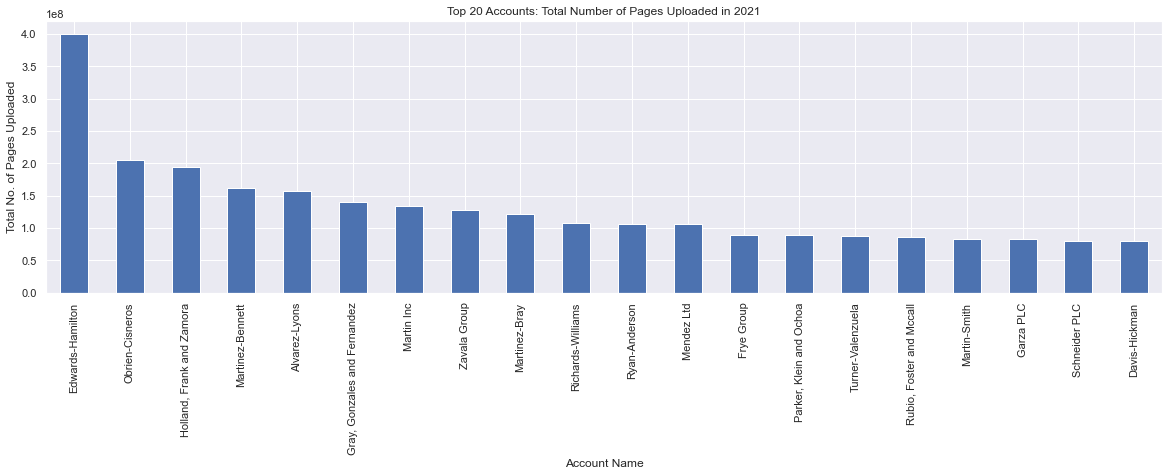

In [139]:
upa.groupby("name")["page_count"].sum().sort_values(ascending=False).head(20).plot(kind='bar')

plt.xlabel("Account Name")
plt.ylabel("Total No. of Pages Uploaded")
plt.title("Top 20 Accounts: Total Number of Pages Uploaded in 2021")
plt.savefig('s11c_top20customers_page_count.jpg', bbox_inches="tight")
plt.show()

**Edwards Hamilton is the customer whom uploaded the largest number of pages in 2021, totaling over 400M pages**

In [140]:
upa.groupby("name")["page_count"].sum().sort_values(ascending=False).head(20)

name
Edwards-Hamilton                400298376
Obrien-Cisneros                 205130318
Holland, Frank and Zamora       194335288
Martinez-Bennett                161580001
Alvarez-Lyons                   157094267
Gray, Gonzales and Fernandez    139495853
Martin Inc                      133255798
Zavala Group                    127890997
Martinez-Bray                   121032014
Richards-Williams               107311855
Ryan-Anderson                   106696972
Mendez Ltd                      105572656
Frye Group                       88865513
Parker, Klein and Ochoa          88317732
Turner-Valenzuela                88092298
Rubio, Foster and Mccall         86520359
Martin-Smith                     82962439
Garza PLC                        82699831
Schneider PLC                    80061320
Davis-Hickman                    79964687
Name: page_count, dtype: int64